In [1]:
import gymnasium as gym
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized BipedalWalker-v3 (dengan 8 environment paralel)
env_train = make_vec_env("BipedalWalker-v3", n_envs=8, vec_env_cls=SubprocVecEnv)

# Definisikan hyperparameter SAC secara lengkap
sac_params = {
    "learning_rate": 3e-4,      # Kecepatan pembelajaran
    "buffer_size": 2000000,     # Kapasitas replay buffer
    "batch_size": 256,          # Ukuran batch untuk update
    "tau": 0.005,               # Soft update target network
    "gamma": 0.99,              # Discount factor
    "train_freq": (1, "step"), # Frekuensi update
    "gradient_steps": -1,       # Update setelah setiap langkah
    "ent_coef": "auto",         # Automatic entropy coefficient tuning
    "target_entropy": "auto",   # Entropy target (default auto)
    "policy_kwargs": dict(net_arch=[256, 256]),  # Arsitektur jaringan
    "use_sde": True,            # Gunakan State-Dependent Exploration (SDE)
    "sde_sample_freq": 8,      # Update noise SDE setiap 64 langkah
}

# Buat model SAC dengan TensorBoard logging
model = SAC(
    "MlpPolicy",
    env_train,
    device="cuda",  # Gunakan GPU jika tersedia
    verbose=1,
    tensorboard_log="./sac_tensorboard/",
    **sac_params
)

# Callback untuk menyimpan model secara berkala (setiap 10.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path="./sac_bipedalwalker/",
    name_prefix="sac_bipedalwalker"
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=200000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("sac_bipedalwalker_final")
print("Model telah disimpan sebagai sac_bipedalwalker_final.zip")

# Tutup environment pelatihan
env_train.close()

# ================================
# Evaluasi Model dalam Mode Human
# ================================

# Buat environment baru dengan render_mode 'human' untuk melihat aksi secara real time
env_human = gym.make("BipedalWalker-v3", render_mode="human")
obs, info = env_human.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Prediksi aksi berdasarkan observasi saat ini
    action, _states = model.predict(obs, deterministic=True)  # Gunakan deterministik saat evaluasi
    obs, reward, done, truncated, info = env_human.step(action)
    total_reward += reward

print(f"Total Reward dalam mode human: {total_reward}")
env_human.close()


Using cuda device
Logging to ./sac_tensorboard/SAC_154


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79.5     |
|    ep_rew_mean     | -100     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 123      |
|    time_elapsed    | 5        |
|    total_timesteps | 672      |
| train/             |          |
|    actor_loss      | -5.98    |
|    critic_loss     | 30.4     |
|    ent_coef        | 0.819    |
|    ent_coef_loss   | -1.26    |
|    learning_rate   | 0.0003   |
|    n_updates       | 568      |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79       |
|    ep_rew_mean     | -101     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 121      |
|    time_elapsed    | 8        |
|    total_timesteps | 1064     |
| train/             |          |
|    actor_loss      | -8.21    |
|    critic_loss     | 13.3     |
|    ent_coef        | 0.725    |
|    ent_coef_loss   | -1.87    |
|    learning_rate   | 0.0003   |
|    n_updates       | 960      |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 76.5     |
|    ep_rew_mean     | -101     |
| time/              |          |
|    episodes        | 12       |
|    fps             | 109      |
|    time_elapsed    | 11       |
|    total_timesteps | 1272     |
| train/             |          |
|    actor_loss      | -9.22    |
|    critic_loss     | 26.2     |
|    ent_coef        | 0.681    |
|    ent_coef_loss   | -2.39    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1168     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.9     |
|    ep_rew_mean     | -104     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 115      |
|    time_elapsed    | 18       |
|    total_timesteps | 2080     |
| train/             |          |
|    actor_loss      | -13.4    |
|    critic_loss     | 21.2     |
|    ent_coef        | 0.535    |
|    ent_coef_loss   | -3.5     |
|    learning_rate   | 0.0003   |
|    n_updates       | 1976     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.3     |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 103      |
|    time_elapsed    | 39       |
|    total_timesteps | 4056     |
| train/             |          |
|    actor_loss      | -17      |
|    critic_loss     | 5.23     |
|    ent_coef        | 0.298    |
|    ent_coef_loss   | -7.37    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3952     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 132      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 24       |
|    fps             | 83       |
|    time_elapsed    | 65       |
|    total_timesteps | 5480     |
| train/             |          |
|    actor_loss      | -17.5    |
|    critic_loss     | 7.13     |
|    ent_coef        | 0.196    |
|    ent_coef_loss   | -8.92    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5376     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 162      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 28       |
|    fps             | 89       |
|    time_elapsed    | 75       |
|    total_timesteps | 6752     |
| train/             |          |
|    actor_loss      | -16.4    |
|    critic_loss     | 2.98     |
|    ent_coef        | 0.138    |
|    ent_coef_loss   | -9.78    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6648     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 180      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 90       |
|    time_elapsed    | 78       |
|    total_timesteps | 7096     |
| train/             |          |
|    actor_loss      | -16      |
|    critic_loss     | 8.58     |
|    ent_coef        | 0.126    |
|    ent_coef_loss   | -9.83    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6992     |
|    std             | 0.05     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 199      |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 36       |
|    fps             | 91       |
|    time_elapsed    | 80       |
|    total_timesteps | 7416     |
| train/             |          |
|    actor_loss      | -14.6    |
|    critic_loss     | 6.5      |
|    ent_coef        | 0.116    |
|    ent_coef_loss   | -8.16    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7312     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 188      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 40       |
|    fps             | 92       |
|    time_elapsed    | 84       |
|    total_timesteps | 7824     |
| train/             |          |
|    actor_loss      | -14.3    |
|    critic_loss     | 3.93     |
|    ent_coef        | 0.105    |
|    ent_coef_loss   | -7.61    |
|    learning_rate   | 0.0003   |
|    n_updates       | 7720     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 180      |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 44       |
|    fps             | 94       |
|    time_elapsed    | 88       |
|    total_timesteps | 8312     |
| train/             |          |
|    actor_loss      | -13.1    |
|    critic_loss     | 8.71     |
|    ent_coef        | 0.0926   |
|    ent_coef_loss   | -9.17    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8208     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 172      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 48       |
|    fps             | 94       |
|    time_elapsed    | 93       |
|    total_timesteps | 8880     |
| train/             |          |
|    actor_loss      | -12.4    |
|    critic_loss     | 2.82     |
|    ent_coef        | 0.0806   |
|    ent_coef_loss   | -7.19    |
|    learning_rate   | 0.0003   |
|    n_updates       | 8776     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 169      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 52       |
|    fps             | 95       |
|    time_elapsed    | 96       |
|    total_timesteps | 9208     |
| train/             |          |
|    actor_loss      | -11.1    |
|    critic_loss     | 3.55     |
|    ent_coef        | 0.0746   |
|    ent_coef_loss   | -7.29    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9104     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 165      |
|    ep_rew_mean     | -112     |
| time/              |          |
|    episodes        | 56       |
|    fps             | 95       |
|    time_elapsed    | 99       |
|    total_timesteps | 9568     |
| train/             |          |
|    actor_loss      | -8.7     |
|    critic_loss     | 5.07     |
|    ent_coef        | 0.0688   |
|    ent_coef_loss   | -7.32    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9464     |
|    std             | 0.0499   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 158      |
|    ep_rew_mean     | -111     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 96       |
|    time_elapsed    | 101      |
|    total_timesteps | 9784     |
| train/             |          |
|    actor_loss      | -9.78    |
|    critic_loss     | 4.06     |
|    ent_coef        | 0.0656   |
|    ent_coef_loss   | -6.93    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9680     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 155      |
|    ep_rew_mean     | -111     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 97       |
|    time_elapsed    | 108      |
|    total_timesteps | 10576    |
| train/             |          |
|    actor_loss      | -7.26    |
|    critic_loss     | 3.66     |
|    ent_coef        | 0.0549   |
|    ent_coef_loss   | -7.26    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10472    |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 152      |
|    ep_rew_mean     | -110     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 97       |
|    time_elapsed    | 112      |
|    total_timesteps | 10960    |
| train/             |          |
|    actor_loss      | -6.9     |
|    critic_loss     | 3.08     |
|    ent_coef        | 0.0505   |
|    ent_coef_loss   | -6.28    |
|    learning_rate   | 0.0003   |
|    n_updates       | 10856    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 148      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 72       |
|    fps             | 97       |
|    time_elapsed    | 115      |
|    total_timesteps | 11320    |
| train/             |          |
|    actor_loss      | -4.66    |
|    critic_loss     | 3.32     |
|    ent_coef        | 0.0468   |
|    ent_coef_loss   | -5.44    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11216    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 143      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 98       |
|    time_elapsed    | 117      |
|    total_timesteps | 11544    |
| train/             |          |
|    actor_loss      | -3.02    |
|    critic_loss     | 4.39     |
|    ent_coef        | 0.0445   |
|    ent_coef_loss   | -4.56    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11440    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 145      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 98       |
|    time_elapsed    | 119      |
|    total_timesteps | 11816    |
| train/             |          |
|    actor_loss      | -2.97    |
|    critic_loss     | 2.91     |
|    ent_coef        | 0.0422   |
|    ent_coef_loss   | -5.39    |
|    learning_rate   | 0.0003   |
|    n_updates       | 11712    |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 141      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 84       |
|    fps             | 98       |
|    time_elapsed    | 122      |
|    total_timesteps | 12112    |
| train/             |          |
|    actor_loss      | -2.74    |
|    critic_loss     | 3.85     |
|    ent_coef        | 0.0398   |
|    ent_coef_loss   | -5.46    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12008    |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 88       |
|    fps             | 99       |
|    time_elapsed    | 125      |
|    total_timesteps | 12464    |
| train/             |          |
|    actor_loss      | -1.5     |
|    critic_loss     | 2.91     |
|    ent_coef        | 0.0371   |
|    ent_coef_loss   | -5.07    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12360    |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 99       |
|    time_elapsed    | 129      |
|    total_timesteps | 12896    |
| train/             |          |
|    actor_loss      | -1.13    |
|    critic_loss     | 2.76     |
|    ent_coef        | 0.034    |
|    ent_coef_loss   | -3.44    |
|    learning_rate   | 0.0003   |
|    n_updates       | 12792    |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 133      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 96       |
|    fps             | 99       |
|    time_elapsed    | 134      |
|    total_timesteps | 13400    |
| train/             |          |
|    actor_loss      | 0.93     |
|    critic_loss     | 3.04     |
|    ent_coef        | 0.0309   |
|    ent_coef_loss   | -4.76    |
|    learning_rate   | 0.0003   |
|    n_updates       | 13296    |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 100      |
|    fps             | 100      |
|    time_elapsed    | 138      |
|    total_timesteps | 13896    |
| train/             |          |
|    actor_loss      | 2.37     |
|    critic_loss     | 3.54     |
|    ent_coef        | 0.0285   |
|    ent_coef_loss   | -3.79    |
|    learning_rate   | 0.0003   |
|    n_updates       | 13792    |
|    std             | 0.0492   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 104      |
|    fps             | 100      |
|    time_elapsed    | 143      |
|    total_timesteps | 14512    |
| train/             |          |
|    actor_loss      | 3.94     |
|    critic_loss     | 3.62     |
|    ent_coef        | 0.0259   |
|    ent_coef_loss   | -2.49    |
|    learning_rate   | 0.0003   |
|    n_updates       | 14408    |
|    std             | 0.0491   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 132      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 102      |
|    time_elapsed    | 154      |
|    total_timesteps | 15776    |
| train/             |          |
|    actor_loss      | 4.83     |
|    critic_loss     | 4.03     |
|    ent_coef        | 0.0225   |
|    ent_coef_loss   | -0.878   |
|    learning_rate   | 0.0003   |
|    n_updates       | 15672    |
|    std             | 0.0489   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 172      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 103      |
|    time_elapsed    | 232      |
|    total_timesteps | 24176    |
| train/             |          |
|    actor_loss      | -3.4     |
|    critic_loss     | 3.44     |
|    ent_coef        | 0.0388   |
|    ent_coef_loss   | -2.24    |
|    learning_rate   | 0.0003   |
|    n_updates       | 24072    |
|    std             | 0.0492   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 230      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 104      |
|    time_elapsed    | 268      |
|    total_timesteps | 28144    |
| train/             |          |
|    actor_loss      | -14      |
|    critic_loss     | 5.49     |
|    ent_coef        | 0.056    |
|    ent_coef_loss   | 0.526    |
|    learning_rate   | 0.0003   |
|    n_updates       | 28040    |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 276      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 105      |
|    time_elapsed    | 349      |
|    total_timesteps | 36856    |
| train/             |          |
|    actor_loss      | -22.7    |
|    critic_loss     | 2.67     |
|    ent_coef        | 0.0404   |
|    ent_coef_loss   | 0.0357   |
|    learning_rate   | 0.0003   |
|    n_updates       | 36752    |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 326      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 105      |
|    time_elapsed    | 376      |
|    total_timesteps | 39568    |
| train/             |          |
|    actor_loss      | -21.6    |
|    critic_loss     | 2.18     |
|    ent_coef        | 0.0329   |
|    ent_coef_loss   | -2.35    |
|    learning_rate   | 0.0003   |
|    n_updates       | 39464    |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 347      |
|    ep_rew_mean     | -105     |
| time/              |          |
|    episodes        | 128      |
|    fps             | 104      |
|    time_elapsed    | 409      |
|    total_timesteps | 42864    |
| train/             |          |
|    actor_loss      | -20.8    |
|    critic_loss     | 2.17     |
|    ent_coef        | 0.0249   |
|    ent_coef_loss   | -1.15    |
|    learning_rate   | 0.0003   |
|    n_updates       | 42760    |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 343      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 132      |
|    fps             | 104      |
|    time_elapsed    | 426      |
|    total_timesteps | 44640    |
| train/             |          |
|    actor_loss      | -18.1    |
|    critic_loss     | 2.15     |
|    ent_coef        | 0.0231   |
|    ent_coef_loss   | -0.184   |
|    learning_rate   | 0.0003   |
|    n_updates       | 44536    |
|    std             | 0.0491   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 352      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 136      |
|    fps             | 104      |
|    time_elapsed    | 452      |
|    total_timesteps | 47264    |
| train/             |          |
|    actor_loss      | -16.4    |
|    critic_loss     | 2.34     |
|    ent_coef        | 0.0216   |
|    ent_coef_loss   | -0.515   |
|    learning_rate   | 0.0003   |
|    n_updates       | 47160    |
|    std             | 0.0489   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 360      |
|    ep_rew_mean     | -109     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 104      |
|    time_elapsed    | 471      |
|    total_timesteps | 49216    |
| train/             |          |
|    actor_loss      | -14.3    |
|    critic_loss     | 2.34     |
|    ent_coef        | 0.0221   |
|    ent_coef_loss   | -0.765   |
|    learning_rate   | 0.0003   |
|    n_updates       | 49112    |
|    std             | 0.0488   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 406      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 144      |
|    fps             | 104      |
|    time_elapsed    | 492      |
|    total_timesteps | 51360    |
| train/             |          |
|    actor_loss      | -11.7    |
|    critic_loss     | 2.57     |
|    ent_coef        | 0.0228   |
|    ent_coef_loss   | 0.249    |
|    learning_rate   | 0.0003   |
|    n_updates       | 51256    |
|    std             | 0.0488   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 417      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 148      |
|    fps             | 104      |
|    time_elapsed    | 502      |
|    total_timesteps | 52408    |
| train/             |          |
|    actor_loss      | -11.3    |
|    critic_loss     | 2.72     |
|    ent_coef        | 0.0212   |
|    ent_coef_loss   | 0.571    |
|    learning_rate   | 0.0003   |
|    n_updates       | 52304    |
|    std             | 0.0488   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 452      |
|    ep_rew_mean     | -108     |
| time/              |          |
|    episodes        | 152      |
|    fps             | 104      |
|    time_elapsed    | 598      |
|    total_timesteps | 62288    |
| train/             |          |
|    actor_loss      | -6.44    |
|    critic_loss     | 1.61     |
|    ent_coef        | 0.018    |
|    ent_coef_loss   | 0.128    |
|    learning_rate   | 0.0003   |
|    n_updates       | 62184    |
|    std             | 0.0484   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 511      |
|    ep_rew_mean     | -107     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 103      |
|    time_elapsed    | 627      |
|    total_timesteps | 65208    |
| train/             |          |
|    actor_loss      | -7.04    |
|    critic_loss     | 1.31     |
|    ent_coef        | 0.0176   |
|    ent_coef_loss   | -0.477   |
|    learning_rate   | 0.0003   |
|    n_updates       | 65104    |
|    std             | 0.0483   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 573      |
|    ep_rew_mean     | -106     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 103      |
|    time_elapsed    | 724      |
|    total_timesteps | 75088    |
| train/             |          |
|    actor_loss      | -4.73    |
|    critic_loss     | 1.07     |
|    ent_coef        | 0.0126   |
|    ent_coef_loss   | -1.05    |
|    learning_rate   | 0.0003   |
|    n_updates       | 74984    |
|    std             | 0.048    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 632      |
|    ep_rew_mean     | -104     |
| time/              |          |
|    episodes        | 164      |
|    fps             | 103      |
|    time_elapsed    | 755      |
|    total_timesteps | 78008    |
| train/             |          |
|    actor_loss      | -4.07    |
|    critic_loss     | 0.949    |
|    ent_coef        | 0.00979  |
|    ent_coef_loss   | -0.827   |
|    learning_rate   | 0.0003   |
|    n_updates       | 77904    |
|    std             | 0.0477   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 678      |
|    ep_rew_mean     | -103     |
| time/              |          |
|    episodes        | 168      |
|    fps             | 103      |
|    time_elapsed    | 788      |
|    total_timesteps | 81264    |
| train/             |          |
|    actor_loss      | -4.41    |
|    critic_loss     | 0.74     |
|    ent_coef        | 0.00823  |
|    ent_coef_loss   | 0.0605   |
|    learning_rate   | 0.0003   |
|    n_updates       | 81160    |
|    std             | 0.0471   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 733      |
|    ep_rew_mean     | -103     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 102      |
|    time_elapsed    | 879      |
|    total_timesteps | 90032    |
| train/             |          |
|    actor_loss      | -2.58    |
|    critic_loss     | 0.604    |
|    ent_coef        | 0.00736  |
|    ent_coef_loss   | 0.672    |
|    learning_rate   | 0.0003   |
|    n_updates       | 89928    |
|    std             | 0.0465   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 795      |
|    ep_rew_mean     | -101     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 102      |
|    time_elapsed    | 919      |
|    total_timesteps | 94064    |
| train/             |          |
|    actor_loss      | -2.78    |
|    critic_loss     | 0.451    |
|    ent_coef        | 0.00677  |
|    ent_coef_loss   | 0.67     |
|    learning_rate   | 0.0003   |
|    n_updates       | 93960    |
|    std             | 0.0462   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 837      |
|    ep_rew_mean     | -99.8    |
| time/              |          |
|    episodes        | 180      |
|    fps             | 102      |
|    time_elapsed    | 1004     |
|    total_timesteps | 102712   |
| train/             |          |
|    actor_loss      | -1.57    |
|    critic_loss     | 0.459    |
|    ent_coef        | 0.00638  |
|    ent_coef_loss   | 0.913    |
|    learning_rate   | 0.0003   |
|    n_updates       | 102608   |
|    std             | 0.0459   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 898      |
|    ep_rew_mean     | -97.2    |
| time/              |          |
|    episodes        | 184      |
|    fps             | 102      |
|    time_elapsed    | 1020     |
|    total_timesteps | 104344   |
| train/             |          |
|    actor_loss      | -1.33    |
|    critic_loss     | 0.446    |
|    ent_coef        | 0.00587  |
|    ent_coef_loss   | 0.0187   |
|    learning_rate   | 0.0003   |
|    n_updates       | 104240   |
|    std             | 0.0458   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 922      |
|    ep_rew_mean     | -97.4    |
| time/              |          |
|    episodes        | 188      |
|    fps             | 102      |
|    time_elapsed    | 1066     |
|    total_timesteps | 109200   |
| train/             |          |
|    actor_loss      | 0.18     |
|    critic_loss     | 0.593    |
|    ent_coef        | 0.00482  |
|    ent_coef_loss   | -0.0112  |
|    learning_rate   | 0.0003   |
|    n_updates       | 109096   |
|    std             | 0.0455   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 966      |
|    ep_rew_mean     | -97.2    |
| time/              |          |
|    episodes        | 192      |
|    fps             | 102      |
|    time_elapsed    | 1107     |
|    total_timesteps | 113488   |
| train/             |          |
|    actor_loss      | 0.508    |
|    critic_loss     | 0.54     |
|    ent_coef        | 0.00438  |
|    ent_coef_loss   | -0.36    |
|    learning_rate   | 0.0003   |
|    n_updates       | 113384   |
|    std             | 0.0452   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.02e+03 |
|    ep_rew_mean     | -96.9    |
| time/              |          |
|    episodes        | 196      |
|    fps             | 102      |
|    time_elapsed    | 1154     |
|    total_timesteps | 118448   |
| train/             |          |
|    actor_loss      | 1.22     |
|    critic_loss     | 0.497    |
|    ent_coef        | 0.00492  |
|    ent_coef_loss   | -1.75    |
|    learning_rate   | 0.0003   |
|    n_updates       | 118344   |
|    std             | 0.0453   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.08e+03 |
|    ep_rew_mean     | -94.6    |
| time/              |          |
|    episodes        | 200      |
|    fps             | 102      |
|    time_elapsed    | 1229     |
|    total_timesteps | 126288   |
| train/             |          |
|    actor_loss      | 2.36     |
|    critic_loss     | 0.553    |
|    ent_coef        | 0.00449  |
|    ent_coef_loss   | 0.98     |
|    learning_rate   | 0.0003   |
|    n_updates       | 126184   |
|    std             | 0.0455   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.14e+03 |
|    ep_rew_mean     | -93.8    |
| time/              |          |
|    episodes        | 204      |
|    fps             | 102      |
|    time_elapsed    | 1275     |
|    total_timesteps | 131088   |
| train/             |          |
|    actor_loss      | 2.02     |
|    critic_loss     | 0.651    |
|    ent_coef        | 0.00547  |
|    ent_coef_loss   | -3.03    |
|    learning_rate   | 0.0003   |
|    n_updates       | 130984   |
|    std             | 0.0458   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.2e+03  |
|    ep_rew_mean     | -88.4    |
| time/              |          |
|    episodes        | 208      |
|    fps             | 102      |
|    time_elapsed    | 1351     |
|    total_timesteps | 139088   |
| train/             |          |
|    actor_loss      | 1.97     |
|    critic_loss     | 0.455    |
|    ent_coef        | 0.00453  |
|    ent_coef_loss   | 0.773    |
|    learning_rate   | 0.0003   |
|    n_updates       | 138984   |
|    std             | 0.0455   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.22e+03 |
|    ep_rew_mean     | -81.3    |
| time/              |          |
|    episodes        | 212      |
|    fps             | 103      |
|    time_elapsed    | 1396     |
|    total_timesteps | 143888   |
| train/             |          |
|    actor_loss      | 1.97     |
|    critic_loss     | 0.331    |
|    ent_coef        | 0.00516  |
|    ent_coef_loss   | -1.76    |
|    learning_rate   | 0.0003   |
|    n_updates       | 143784   |
|    std             | 0.0455   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.22e+03 |
|    ep_rew_mean     | -79.1    |
| time/              |          |
|    episodes        | 216      |
|    fps             | 103      |
|    time_elapsed    | 1464     |
|    total_timesteps | 151888   |
| train/             |          |
|    actor_loss      | 2.22     |
|    critic_loss     | 0.301    |
|    ent_coef        | 0.00534  |
|    ent_coef_loss   | 0.175    |
|    learning_rate   | 0.0003   |
|    n_updates       | 151784   |
|    std             | 0.0452   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.24e+03 |
|    ep_rew_mean     | -73.8    |
| time/              |          |
|    episodes        | 220      |
|    fps             | 104      |
|    time_elapsed    | 1503     |
|    total_timesteps | 156688   |
| train/             |          |
|    actor_loss      | 2.38     |
|    critic_loss     | 0.478    |
|    ent_coef        | 0.0052   |
|    ent_coef_loss   | 0.279    |
|    learning_rate   | 0.0003   |
|    n_updates       | 156584   |
|    std             | 0.0452   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.23e+03 |
|    ep_rew_mean     | -68.8    |
| time/              |          |
|    episodes        | 224      |
|    fps             | 104      |
|    time_elapsed    | 1560     |
|    total_timesteps | 163720   |
| train/             |          |
|    actor_loss      | 2.68     |
|    critic_loss     | 0.319    |
|    ent_coef        | 0.00384  |
|    ent_coef_loss   | -1.07    |
|    learning_rate   | 0.0003   |
|    n_updates       | 163616   |
|    std             | 0.0449   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.26e+03 |
|    ep_rew_mean     | -60.8    |
| time/              |          |
|    episodes        | 228      |
|    fps             | 105      |
|    time_elapsed    | 1607     |
|    total_timesteps | 169488   |
| train/             |          |
|    actor_loss      | 1.65     |
|    critic_loss     | 0.35     |
|    ent_coef        | 0.00416  |
|    ent_coef_loss   | 1.58     |
|    learning_rate   | 0.0003   |
|    n_updates       | 169384   |
|    std             | 0.0446   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.31e+03 |
|    ep_rew_mean     | -52.7    |
| time/              |          |
|    episodes        | 232      |
|    fps             | 105      |
|    time_elapsed    | 1664     |
|    total_timesteps | 176376   |
| train/             |          |
|    actor_loss      | 0.204    |
|    critic_loss     | 0.233    |
|    ent_coef        | 0.00547  |
|    ent_coef_loss   | -3.4     |
|    learning_rate   | 0.0003   |
|    n_updates       | 176272   |
|    std             | 0.0448   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.33e+03 |
|    ep_rew_mean     | -46.6    |
| time/              |          |
|    episodes        | 236      |
|    fps             | 106      |
|    time_elapsed    | 1696     |
|    total_timesteps | 180368   |
| train/             |          |
|    actor_loss      | 0.853    |
|    critic_loss     | 0.291    |
|    ent_coef        | 0.00417  |
|    ent_coef_loss   | -0.913   |
|    learning_rate   | 0.0003   |
|    n_updates       | 180264   |
|    std             | 0.0446   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.39e+03 |
|    ep_rew_mean     | -35.5    |
| time/              |          |
|    episodes        | 240      |
|    fps             | 106      |
|    time_elapsed    | 1769     |
|    total_timesteps | 189176   |
| train/             |          |
|    actor_loss      | -0.393   |
|    critic_loss     | 0.35     |
|    ent_coef        | 0.00491  |
|    ent_coef_loss   | 0.526    |
|    learning_rate   | 0.0003   |
|    n_updates       | 189072   |
|    std             | 0.0448   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.4e+03  |
|    ep_rew_mean     | -22.4    |
| time/              |          |
|    episodes        | 244      |
|    fps             | 107      |
|    time_elapsed    | 1801     |
|    total_timesteps | 193168   |
| train/             |          |
|    actor_loss      | -0.594   |
|    critic_loss     | 0.318    |
|    ent_coef        | 0.0051   |
|    ent_coef_loss   | 1.59     |
|    learning_rate   | 0.0003   |
|    n_updates       | 193064   |
|    std             | 0.0449   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.43e+03 |
|    ep_rew_mean     | -12.3    |
| time/              |          |
|    episodes        | 248      |
|    fps             | 107      |
|    time_elapsed    | 1854     |
|    total_timesteps | 199152   |
| train/             |          |
|    actor_loss      | -1.91    |
|    critic_loss     | 0.29     |
|    ent_coef        | 0.00563  |
|    ent_coef_loss   | -3.45    |
|    learning_rate   | 0.0003   |
|    n_updates       | 199048   |
|    std             | 0.0451   |
---------------------------------


Model telah disimpan sebagai sac_bipedalwalker_final.zip
Total Reward dalam mode human: 288.53668212890625


In [1]:
import gymnasium as gym
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

model = SAC.load("sac_bipedalwalker_final")

# Buat environment baru dengan render_mode 'human'
env_human = gym.make("BipedalWalker-v3", render_mode="human")
obs, info = env_human.reset()
done, truncated = False, False
total_reward = 0

while not (done or truncated):
    # Prediksi aksi berdasarkan observasi saat ini
    action, _states = model.predict(obs, deterministic=True)  # Gunakan deterministik saat evaluasi
    obs, reward, done, truncated, info = env_human.step(action)
    total_reward += reward
    # env_human.render() sudah dilakukan secara otomatis dalam mode 'human'

print(f"Total Reward dalam mode human: {total_reward}")
env_human.close()


Total Reward dalam mode human: 302.98486328125


In [ ]:
import gymnasium as gym
from LunarLander3DEnv.envs import LunarLander3DEnv
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import CheckpointCallback

# ================================
# Pelatihan dengan Vectorized Environment
# ================================

# Buat environment vectorized BipedalWalker-v3 (dengan 8 environment paralel)
env_train = make_vec_env("LunarLander3DEnv-v0", n_envs=8, vec_env_cls=DummyVecEnv)

# Definisikan hyperparameter SAC secara lengkap
sac_params = {
    "learning_rate": 5e-4,      # Kecepatan pembelajaran
    "buffer_size": 1000000,     # Kapasitas replay buffer
    "batch_size": 256,          # Ukuran batch untuk update
    "policy_kwargs": dict(net_arch=[1024, 1024]),  # Arsitektur jaringan
    "use_sde": True,            # Gunakan State-Dependent Exploration (SDE)
    "sde_sample_freq": 32,      # Update noise SDE setiap 64 langkah
}

# Buat model SAC dengan TensorBoard logging
model = SAC(
    "MlpPolicy",
    env_train,
    device="cuda",  # Gunakan GPU jika tersedia
    verbose=1,
    tensorboard_log="./sac_tensorboard/",
    **sac_params
)

# Callback untuk menyimpan model secara berkala (setiap 10.000 timesteps)
checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path="./sac_lunar/",
    name_prefix="sac_lunar"
)

# Mulai pelatihan model selama 1.000.000 timesteps dengan progress bar
model.learn(total_timesteps=100000, progress_bar=True, callback=checkpoint_callback)

# Simpan model final
model.save("sac_lunar_final")
print("Model telah disimpan sebagai sac_lunar_final.zip")

# Tutup environment pelatihan
env_train.close()


Using cuda device
Logging to ./sac_tensorboard/SAC_157


Output()

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 115       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 162       |
|    time_elapsed    | 6         |
|    total_timesteps | 1048      |
| train/             |           |
|    actor_loss      | -25.5     |
|    critic_loss     | 3.98e+03  |
|    ent_coef        | 0.941     |
|    ent_coef_loss   | -2.07     |
|    learning_rate   | 0.0005    |
|    n_updates       | 118       |
|    std             | 0.0498    |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 133      |
|    ep_rew_mean     | -937     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 166      |
|    time_elapsed    | 8        |
|    total_timesteps | 1440     |
| train/             |          |
|    actor_loss      | -24.6    |
|    critic_loss     | 30.7     |
|    ent_coef        | 0.918    |
|    ent_coef_loss   | -3       |
|    learning_rate   | 0.0005   |
|    n_updates       | 167      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 116      |
|    ep_rew_mean     | -930     |
| time/              |          |
|    episodes        | 12       |
|    fps             | 163      |
|    time_elapsed    | 10       |
|    total_timesteps | 1736     |
| train/             |          |
|    actor_loss      | -21.9    |
|    critic_loss     | 1.18e+04 |
|    ent_coef        | 0.901    |
|    ent_coef_loss   | -3.62    |
|    learning_rate   | 0.0005   |
|    n_updates       | 204      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 113      |
|    ep_rew_mean     | -934     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 174      |
|    time_elapsed    | 12       |
|    total_timesteps | 2264     |
| train/             |          |
|    actor_loss      | -24.3    |
|    critic_loss     | 3.92e+03 |
|    ent_coef        | 0.872    |
|    ent_coef_loss   | -4.28    |
|    learning_rate   | 0.0005   |
|    n_updates       | 270      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 113      |
|    ep_rew_mean     | -942     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 179      |
|    time_elapsed    | 15       |
|    total_timesteps | 2728     |
| train/             |          |
|    actor_loss      | -22.4    |
|    critic_loss     | 7.83e+03 |
|    ent_coef        | 0.848    |
|    ent_coef_loss   | -5.3     |
|    learning_rate   | 0.0005   |
|    n_updates       | 328      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 113      |
|    ep_rew_mean     | -940     |
| time/              |          |
|    episodes        | 24       |
|    fps             | 168      |
|    time_elapsed    | 16       |
|    total_timesteps | 2832     |
| train/             |          |
|    actor_loss      | -21.8    |
|    critic_loss     | 4.11e+03 |
|    ent_coef        | 0.843    |
|    ent_coef_loss   | -6.26    |
|    learning_rate   | 0.0005   |
|    n_updates       | 341      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 108      |
|    ep_rew_mean     | -943     |
| time/              |          |
|    episodes        | 28       |
|    fps             | 178      |
|    time_elapsed    | 19       |
|    total_timesteps | 3440     |
| train/             |          |
|    actor_loss      | -16.4    |
|    critic_loss     | 4.07e+03 |
|    ent_coef        | 0.814    |
|    ent_coef_loss   | -5.4     |
|    learning_rate   | 0.0005   |
|    n_updates       | 417      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 107      |
|    ep_rew_mean     | -940     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 170      |
|    time_elapsed    | 20       |
|    total_timesteps | 3560     |
| train/             |          |
|    actor_loss      | -20      |
|    critic_loss     | 1.9e+04  |
|    ent_coef        | 0.809    |
|    ent_coef_loss   | -4.32    |
|    learning_rate   | 0.0005   |
|    n_updates       | 432      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | -941     |
| time/              |          |
|    episodes        | 36       |
|    fps             | 168      |
|    time_elapsed    | 22       |
|    total_timesteps | 3872     |
| train/             |          |
|    actor_loss      | -17.9    |
|    critic_loss     | 1.13e+04 |
|    ent_coef        | 0.795    |
|    ent_coef_loss   | -5.46    |
|    learning_rate   | 0.0005   |
|    n_updates       | 471      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.1     |
|    ep_rew_mean     | -950     |
| time/              |          |
|    episodes        | 40       |
|    fps             | 162      |
|    time_elapsed    | 24       |
|    total_timesteps | 3976     |
| train/             |          |
|    actor_loss      | -18.4    |
|    critic_loss     | 7.7e+03  |
|    ent_coef        | 0.791    |
|    ent_coef_loss   | -5.49    |
|    learning_rate   | 0.0005   |
|    n_updates       | 484      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.8     |
|    ep_rew_mean     | -955     |
| time/              |          |
|    episodes        | 44       |
|    fps             | 169      |
|    time_elapsed    | 27       |
|    total_timesteps | 4576     |
| train/             |          |
|    actor_loss      | -19.4    |
|    critic_loss     | 2.22e+04 |
|    ent_coef        | 0.771    |
|    ent_coef_loss   | -3.62    |
|    learning_rate   | 0.0005   |
|    n_updates       | 559      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.5     |
|    ep_rew_mean     | -958     |
| time/              |          |
|    episodes        | 48       |
|    fps             | 166      |
|    time_elapsed    | 28       |
|    total_timesteps | 4792     |
| train/             |          |
|    actor_loss      | 7.18     |
|    critic_loss     | 1.49e+04 |
|    ent_coef        | 0.767    |
|    ent_coef_loss   | 1.06     |
|    learning_rate   | 0.0005   |
|    n_updates       | 586      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.4     |
|    ep_rew_mean     | -956     |
| time/              |          |
|    episodes        | 52       |
|    fps             | 165      |
|    time_elapsed    | 30       |
|    total_timesteps | 5056     |
| train/             |          |
|    actor_loss      | -18.8    |
|    critic_loss     | 1.19e+04 |
|    ent_coef        | 0.762    |
|    ent_coef_loss   | -5.53    |
|    learning_rate   | 0.0005   |
|    n_updates       | 619      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.2     |
|    ep_rew_mean     | -959     |
| time/              |          |
|    episodes        | 56       |
|    fps             | 163      |
|    time_elapsed    | 32       |
|    total_timesteps | 5344     |
| train/             |          |
|    actor_loss      | -25.8    |
|    critic_loss     | 1.17e+04 |
|    ent_coef        | 0.755    |
|    ent_coef_loss   | -1.91    |
|    learning_rate   | 0.0005   |
|    n_updates       | 655      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.6     |
|    ep_rew_mean     | -963     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 163      |
|    time_elapsed    | 34       |
|    total_timesteps | 5656     |
| train/             |          |
|    actor_loss      | -2.26    |
|    critic_loss     | 1.89e+04 |
|    ent_coef        | 0.751    |
|    ent_coef_loss   | -2.77    |
|    learning_rate   | 0.0005   |
|    n_updates       | 694      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.9     |
|    ep_rew_mean     | -967     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 157      |
|    time_elapsed    | 37       |
|    total_timesteps | 5832     |
| train/             |          |
|    actor_loss      | 0.102    |
|    critic_loss     | 1.81e+04 |
|    ent_coef        | 0.748    |
|    ent_coef_loss   | 0.676    |
|    learning_rate   | 0.0005   |
|    n_updates       | 716      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 85.7     |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 156      |
|    time_elapsed    | 38       |
|    total_timesteps | 5968     |
| train/             |          |
|    actor_loss      | -6.34    |
|    critic_loss     | 558      |
|    ent_coef        | 0.747    |
|    ent_coef_loss   | -6.21    |
|    learning_rate   | 0.0005   |
|    n_updates       | 733      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.6     |
|    ep_rew_mean     | -973     |
| time/              |          |
|    episodes        | 72       |
|    fps             | 152      |
|    time_elapsed    | 39       |
|    total_timesteps | 6040     |
| train/             |          |
|    actor_loss      | 28.3     |
|    critic_loss     | 1.86e+04 |
|    ent_coef        | 0.747    |
|    ent_coef_loss   | -2.7     |
|    learning_rate   | 0.0005   |
|    n_updates       | 742      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 79.8     |
|    ep_rew_mean     | -973     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 149      |
|    time_elapsed    | 41       |
|    total_timesteps | 6160     |
| train/             |          |
|    actor_loss      | 15.4     |
|    critic_loss     | 7.26e+03 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -2.62    |
|    learning_rate   | 0.0005   |
|    n_updates       | 757      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 77.1     |
|    ep_rew_mean     | -974     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 146      |
|    time_elapsed    | 42       |
|    total_timesteps | 6272     |
| train/             |          |
|    actor_loss      | 35.3     |
|    critic_loss     | 353      |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -1.87    |
|    learning_rate   | 0.0005   |
|    n_updates       | 771      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 74.9     |
|    ep_rew_mean     | -975     |
| time/              |          |
|    episodes        | 84       |
|    fps             | 145      |
|    time_elapsed    | 44       |
|    total_timesteps | 6448     |
| train/             |          |
|    actor_loss      | 38.4     |
|    critic_loss     | 3.72e+03 |
|    ent_coef        | 0.744    |
|    ent_coef_loss   | -1.63    |
|    learning_rate   | 0.0005   |
|    n_updates       | 793      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 72.6     |
|    ep_rew_mean     | -977     |
| time/              |          |
|    episodes        | 88       |
|    fps             | 141      |
|    time_elapsed    | 46       |
|    total_timesteps | 6552     |
| train/             |          |
|    actor_loss      | 19.8     |
|    critic_loss     | 1.11e+04 |
|    ent_coef        | 0.744    |
|    ent_coef_loss   | -0.0156  |
|    learning_rate   | 0.0005   |
|    n_updates       | 806      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 71.4     |
|    ep_rew_mean     | -977     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 141      |
|    time_elapsed    | 47       |
|    total_timesteps | 6744     |
| train/             |          |
|    actor_loss      | 19.7     |
|    critic_loss     | 1.48e+04 |
|    ent_coef        | 0.745    |
|    ent_coef_loss   | -4.77    |
|    learning_rate   | 0.0005   |
|    n_updates       | 830      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 69.8     |
|    ep_rew_mean     | -978     |
| time/              |          |
|    episodes        | 96       |
|    fps             | 138      |
|    time_elapsed    | 49       |
|    total_timesteps | 6792     |
| train/             |          |
|    actor_loss      | 66.8     |
|    critic_loss     | 7.48e+03 |
|    ent_coef        | 0.745    |
|    ent_coef_loss   | 2.13     |
|    learning_rate   | 0.0005   |
|    n_updates       | 836      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 68.5     |
|    ep_rew_mean     | -978     |
| time/              |          |
|    episodes        | 100      |
|    fps             | 137      |
|    time_elapsed    | 51       |
|    total_timesteps | 7008     |
| train/             |          |
|    actor_loss      | 42.1     |
|    critic_loss     | 3.46e+03 |
|    ent_coef        | 0.745    |
|    ent_coef_loss   | 3.06     |
|    learning_rate   | 0.0005   |
|    n_updates       | 863      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 65.3     |
|    ep_rew_mean     | -977     |
| time/              |          |
|    episodes        | 104      |
|    fps             | 134      |
|    time_elapsed    | 52       |
|    total_timesteps | 7080     |
| train/             |          |
|    actor_loss      | 12.8     |
|    critic_loss     | 1.77e+04 |
|    ent_coef        | 0.745    |
|    ent_coef_loss   | -1.31    |
|    learning_rate   | 0.0005   |
|    n_updates       | 872      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 60.5     |
|    ep_rew_mean     | -981     |
| time/              |          |
|    episodes        | 108      |
|    fps             | 134      |
|    time_elapsed    | 54       |
|    total_timesteps | 7328     |
| train/             |          |
|    actor_loss      | 24.2     |
|    critic_loss     | 7e+03    |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -1.92    |
|    learning_rate   | 0.0005   |
|    n_updates       | 903      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 58.2     |
|    ep_rew_mean     | -986     |
| time/              |          |
|    episodes        | 112      |
|    fps             | 131      |
|    time_elapsed    | 56       |
|    total_timesteps | 7432     |
| train/             |          |
|    actor_loss      | 53.6     |
|    critic_loss     | 1.03e+04 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | 0.169    |
|    learning_rate   | 0.0005   |
|    n_updates       | 916      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 55.6     |
|    ep_rew_mean     | -986     |
| time/              |          |
|    episodes        | 116      |
|    fps             | 129      |
|    time_elapsed    | 58       |
|    total_timesteps | 7584     |
| train/             |          |
|    actor_loss      | 56.4     |
|    critic_loss     | 2.32e+04 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | 1.01     |
|    learning_rate   | 0.0005   |
|    n_updates       | 935      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 53.1     |
|    ep_rew_mean     | -987     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 127      |
|    time_elapsed    | 59       |
|    total_timesteps | 7672     |
| train/             |          |
|    actor_loss      | 33.9     |
|    critic_loss     | 2.08e+04 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -2.27    |
|    learning_rate   | 0.0005   |
|    n_updates       | 946      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.6     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 126      |
|    time_elapsed    | 62       |
|    total_timesteps | 7856     |
| train/             |          |
|    actor_loss      | 46.2     |
|    critic_loss     | 1.08e+04 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -1.46    |
|    learning_rate   | 0.0005   |
|    n_updates       | 969      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.4     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 128      |
|    fps             | 126      |
|    time_elapsed    | 63       |
|    total_timesteps | 8008     |
| train/             |          |
|    actor_loss      | 64.3     |
|    critic_loss     | 2.02e+04 |
|    ent_coef        | 0.746    |
|    ent_coef_loss   | -3.14    |
|    learning_rate   | 0.0005   |
|    n_updates       | 988      |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.1     |
|    ep_rew_mean     | -993     |
| time/              |          |
|    episodes        | 132      |
|    fps             | 125      |
|    time_elapsed    | 65       |
|    total_timesteps | 8208     |
| train/             |          |
|    actor_loss      | 63       |
|    critic_loss     | 1.7e+04  |
|    ent_coef        | 0.747    |
|    ent_coef_loss   | -1.89    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1013     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.9     |
|    ep_rew_mean     | -994     |
| time/              |          |
|    episodes        | 136      |
|    fps             | 124      |
|    time_elapsed    | 67       |
|    total_timesteps | 8424     |
| train/             |          |
|    actor_loss      | 65       |
|    critic_loss     | 6.61e+03 |
|    ent_coef        | 0.748    |
|    ent_coef_loss   | -0.234   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1040     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.6     |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 123      |
|    time_elapsed    | 69       |
|    total_timesteps | 8544     |
| train/             |          |
|    actor_loss      | 59.7     |
|    critic_loss     | 1.59e+04 |
|    ent_coef        | 0.749    |
|    ent_coef_loss   | 2.66     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1055     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 144      |
|    fps             | 122      |
|    time_elapsed    | 71       |
|    total_timesteps | 8728     |
| train/             |          |
|    actor_loss      | 41.4     |
|    critic_loss     | 1.52e+04 |
|    ent_coef        | 0.75     |
|    ent_coef_loss   | 2.25     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1078     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.2     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 148      |
|    fps             | 122      |
|    time_elapsed    | 72       |
|    total_timesteps | 8936     |
| train/             |          |
|    actor_loss      | 95.9     |
|    critic_loss     | 1.58e+04 |
|    ent_coef        | 0.752    |
|    ent_coef_loss   | 5.2      |
|    learning_rate   | 0.0005   |
|    n_updates       | 1104     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.3     |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 152      |
|    fps             | 121      |
|    time_elapsed    | 74       |
|    total_timesteps | 9024     |
| train/             |          |
|    actor_loss      | 60.2     |
|    critic_loss     | 1.27e+04 |
|    ent_coef        | 0.753    |
|    ent_coef_loss   | -3.13    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1115     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.2     |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 156      |
|    fps             | 121      |
|    time_elapsed    | 76       |
|    total_timesteps | 9248     |
| train/             |          |
|    actor_loss      | 78.8     |
|    critic_loss     | 1.16e+04 |
|    ent_coef        | 0.754    |
|    ent_coef_loss   | 6.4      |
|    learning_rate   | 0.0005   |
|    n_updates       | 1143     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.1     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 120      |
|    time_elapsed    | 77       |
|    total_timesteps | 9384     |
| train/             |          |
|    actor_loss      | 88.5     |
|    critic_loss     | 3.13e+03 |
|    ent_coef        | 0.755    |
|    ent_coef_loss   | 1.95     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1160     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.8     |
|    ep_rew_mean     | -989     |
| time/              |          |
|    episodes        | 164      |
|    fps             | 119      |
|    time_elapsed    | 79       |
|    total_timesteps | 9520     |
| train/             |          |
|    actor_loss      | 86.8     |
|    critic_loss     | 1.3e+04  |
|    ent_coef        | 0.756    |
|    ent_coef_loss   | 3.17     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1177     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.1     |
|    ep_rew_mean     | -987     |
| time/              |          |
|    episodes        | 168      |
|    fps             | 119      |
|    time_elapsed    | 81       |
|    total_timesteps | 9728     |
| train/             |          |
|    actor_loss      | 106      |
|    critic_loss     | 8.71e+03 |
|    ent_coef        | 0.76     |
|    ent_coef_loss   | 4        |
|    learning_rate   | 0.0005   |
|    n_updates       | 1203     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 37.6     |
|    ep_rew_mean     | -986     |
| time/              |          |
|    episodes        | 172      |
|    fps             | 119      |
|    time_elapsed    | 83       |
|    total_timesteps | 9912     |
| train/             |          |
|    actor_loss      | 87       |
|    critic_loss     | 2.1e+04  |
|    ent_coef        | 0.762    |
|    ent_coef_loss   | 0.852    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1226     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.3     |
|    ep_rew_mean     | -987     |
| time/              |          |
|    episodes        | 176      |
|    fps             | 118      |
|    time_elapsed    | 84       |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | 105      |
|    critic_loss     | 2.42e+04 |
|    ent_coef        | 0.765    |
|    ent_coef_loss   | 0.0159   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1237     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39       |
|    ep_rew_mean     | -985     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 117      |
|    time_elapsed    | 86       |
|    total_timesteps | 10256    |
| train/             |          |
|    actor_loss      | 113      |
|    critic_loss     | 2.57e+04 |
|    ent_coef        | 0.768    |
|    ent_coef_loss   | 2.71     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1269     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.5     |
|    ep_rew_mean     | -984     |
| time/              |          |
|    episodes        | 184      |
|    fps             | 118      |
|    time_elapsed    | 88       |
|    total_timesteps | 10424    |
| train/             |          |
|    actor_loss      | 110      |
|    critic_loss     | 9.04e+03 |
|    ent_coef        | 0.77     |
|    ent_coef_loss   | 1.28     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1290     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.9     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 188      |
|    fps             | 117      |
|    time_elapsed    | 89       |
|    total_timesteps | 10576    |
| train/             |          |
|    actor_loss      | 133      |
|    critic_loss     | 1.36e+04 |
|    ent_coef        | 0.773    |
|    ent_coef_loss   | 5.85     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1309     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.1     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 192      |
|    fps             | 116      |
|    time_elapsed    | 91       |
|    total_timesteps | 10744    |
| train/             |          |
|    actor_loss      | 115      |
|    critic_loss     | 1.95e+04 |
|    ent_coef        | 0.776    |
|    ent_coef_loss   | -3.46    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1330     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.5     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 196      |
|    fps             | 116      |
|    time_elapsed    | 93       |
|    total_timesteps | 10928    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 1.31e+04 |
|    ent_coef        | 0.779    |
|    ent_coef_loss   | -2.25    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1353     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41       |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 200      |
|    fps             | 116      |
|    time_elapsed    | 95       |
|    total_timesteps | 11072    |
| train/             |          |
|    actor_loss      | 124      |
|    critic_loss     | 1.35e+04 |
|    ent_coef        | 0.78     |
|    ent_coef_loss   | 1.43     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1371     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.2     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 204      |
|    fps             | 115      |
|    time_elapsed    | 97       |
|    total_timesteps | 11248    |
| train/             |          |
|    actor_loss      | 150      |
|    critic_loss     | 2.14e+04 |
|    ent_coef        | 0.782    |
|    ent_coef_loss   | 5.66     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1393     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.7     |
|    ep_rew_mean     | -984     |
| time/              |          |
|    episodes        | 208      |
|    fps             | 116      |
|    time_elapsed    | 98       |
|    total_timesteps | 11472    |
| train/             |          |
|    actor_loss      | 82.8     |
|    critic_loss     | 3.82e+03 |
|    ent_coef        | 0.784    |
|    ent_coef_loss   | 0.629    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1421     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 41.9     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 212      |
|    fps             | 115      |
|    time_elapsed    | 100      |
|    total_timesteps | 11576    |
| train/             |          |
|    actor_loss      | 148      |
|    critic_loss     | 1.85e+04 |
|    ent_coef        | 0.786    |
|    ent_coef_loss   | 2.56     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1434     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 42.4     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 216      |
|    fps             | 115      |
|    time_elapsed    | 102      |
|    total_timesteps | 11856    |
| train/             |          |
|    actor_loss      | 136      |
|    critic_loss     | 1.39e+04 |
|    ent_coef        | 0.79     |
|    ent_coef_loss   | 3.84     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1469     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43       |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 220      |
|    fps             | 115      |
|    time_elapsed    | 103      |
|    total_timesteps | 11992    |
| train/             |          |
|    actor_loss      | 138      |
|    critic_loss     | 1.02e+04 |
|    ent_coef        | 0.793    |
|    ent_coef_loss   | 1.75     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1486     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.2     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 224      |
|    fps             | 115      |
|    time_elapsed    | 105      |
|    total_timesteps | 12200    |
| train/             |          |
|    actor_loss      | 148      |
|    critic_loss     | 6.1e+03  |
|    ent_coef        | 0.797    |
|    ent_coef_loss   | 1.99     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1512     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.6     |
|    ep_rew_mean     | -984     |
| time/              |          |
|    episodes        | 228      |
|    fps             | 115      |
|    time_elapsed    | 107      |
|    total_timesteps | 12440    |
| train/             |          |
|    actor_loss      | 153      |
|    critic_loss     | 2.66e+03 |
|    ent_coef        | 0.8      |
|    ent_coef_loss   | 0.9      |
|    learning_rate   | 0.0005   |
|    n_updates       | 1542     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.8     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 232      |
|    fps             | 114      |
|    time_elapsed    | 109      |
|    total_timesteps | 12528    |
| train/             |          |
|    actor_loss      | 148      |
|    critic_loss     | 1.55e+04 |
|    ent_coef        | 0.801    |
|    ent_coef_loss   | -2.62    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1553     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.6     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 236      |
|    fps             | 115      |
|    time_elapsed    | 111      |
|    total_timesteps | 12880    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 9.45e+03 |
|    ent_coef        | 0.807    |
|    ent_coef_loss   | -0.721   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1597     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44       |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 240      |
|    fps             | 114      |
|    time_elapsed    | 112      |
|    total_timesteps | 12960    |
| train/             |          |
|    actor_loss      | 182      |
|    critic_loss     | 4.4e+03  |
|    ent_coef        | 0.808    |
|    ent_coef_loss   | 3.52     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1607     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.2     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 244      |
|    fps             | 115      |
|    time_elapsed    | 114      |
|    total_timesteps | 13216    |
| train/             |          |
|    actor_loss      | 131      |
|    critic_loss     | 1.75e+04 |
|    ent_coef        | 0.811    |
|    ent_coef_loss   | -2.39    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1639     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.2     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 248      |
|    fps             | 114      |
|    time_elapsed    | 116      |
|    total_timesteps | 13376    |
| train/             |          |
|    actor_loss      | 170      |
|    critic_loss     | 6.9e+03  |
|    ent_coef        | 0.814    |
|    ent_coef_loss   | 2.51     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1659     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.8     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 252      |
|    fps             | 114      |
|    time_elapsed    | 118      |
|    total_timesteps | 13624    |
| train/             |          |
|    actor_loss      | 199      |
|    critic_loss     | 7.23e+03 |
|    ent_coef        | 0.819    |
|    ent_coef_loss   | 3.49     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1690     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.6     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 256      |
|    fps             | 114      |
|    time_elapsed    | 120      |
|    total_timesteps | 13792    |
| train/             |          |
|    actor_loss      | 165      |
|    critic_loss     | 1.73e+04 |
|    ent_coef        | 0.823    |
|    ent_coef_loss   | 5.11     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1711     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.2     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 260      |
|    fps             | 115      |
|    time_elapsed    | 122      |
|    total_timesteps | 14104    |
| train/             |          |
|    actor_loss      | 170      |
|    critic_loss     | 1.39e+04 |
|    ent_coef        | 0.827    |
|    ent_coef_loss   | 0.0966   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1750     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.7     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 264      |
|    fps             | 114      |
|    time_elapsed    | 123      |
|    total_timesteps | 14200    |
| train/             |          |
|    actor_loss      | 172      |
|    critic_loss     | 1.29e+04 |
|    ent_coef        | 0.828    |
|    ent_coef_loss   | 3.87     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1762     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.1     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 268      |
|    fps             | 115      |
|    time_elapsed    | 125      |
|    total_timesteps | 14472    |
| train/             |          |
|    actor_loss      | 175      |
|    critic_loss     | 9.63e+03 |
|    ent_coef        | 0.831    |
|    ent_coef_loss   | -1.27    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1796     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.8     |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 272      |
|    fps             | 115      |
|    time_elapsed    | 127      |
|    total_timesteps | 14752    |
| train/             |          |
|    actor_loss      | 98.7     |
|    critic_loss     | 9.55e+03 |
|    ent_coef        | 0.833    |
|    ent_coef_loss   | 1.61     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1831     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.4     |
|    ep_rew_mean     | -983     |
| time/              |          |
|    episodes        | 276      |
|    fps             | 115      |
|    time_elapsed    | 128      |
|    total_timesteps | 14880    |
| train/             |          |
|    actor_loss      | 33       |
|    critic_loss     | 1.91e+04 |
|    ent_coef        | 0.833    |
|    ent_coef_loss   | -0.627   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1847     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.4     |
|    ep_rew_mean     | -985     |
| time/              |          |
|    episodes        | 280      |
|    fps             | 115      |
|    time_elapsed    | 130      |
|    total_timesteps | 15072    |
| train/             |          |
|    actor_loss      | 8.83     |
|    critic_loss     | 1.09e+04 |
|    ent_coef        | 0.832    |
|    ent_coef_loss   | -0.921   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1871     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.2     |
|    ep_rew_mean     | -989     |
| time/              |          |
|    episodes        | 284      |
|    fps             | 114      |
|    time_elapsed    | 132      |
|    total_timesteps | 15168    |
| train/             |          |
|    actor_loss      | 12.8     |
|    critic_loss     | 1.09e+04 |
|    ent_coef        | 0.832    |
|    ent_coef_loss   | 0.0956   |
|    learning_rate   | 0.0005   |
|    n_updates       | 1883     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.3     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 288      |
|    fps             | 115      |
|    time_elapsed    | 134      |
|    total_timesteps | 15632    |
| train/             |          |
|    actor_loss      | -25.7    |
|    critic_loss     | 1.48e+04 |
|    ent_coef        | 0.837    |
|    ent_coef_loss   | -0.00761 |
|    learning_rate   | 0.0005   |
|    n_updates       | 1941     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.5     |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 292      |
|    fps             | 115      |
|    time_elapsed    | 136      |
|    total_timesteps | 15712    |
| train/             |          |
|    actor_loss      | -24.2    |
|    critic_loss     | 5.87e+03 |
|    ent_coef        | 0.838    |
|    ent_coef_loss   | -1.74    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1951     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.9     |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 296      |
|    fps             | 115      |
|    time_elapsed    | 137      |
|    total_timesteps | 15864    |
| train/             |          |
|    actor_loss      | -17.3    |
|    critic_loss     | 2.05e+04 |
|    ent_coef        | 0.841    |
|    ent_coef_loss   | 2.08     |
|    learning_rate   | 0.0005   |
|    n_updates       | 1970     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.4     |
|    ep_rew_mean     | -993     |
| time/              |          |
|    episodes        | 300      |
|    fps             | 114      |
|    time_elapsed    | 139      |
|    total_timesteps | 16032    |
| train/             |          |
|    actor_loss      | 9.79     |
|    critic_loss     | 1.07e+04 |
|    ent_coef        | 0.846    |
|    ent_coef_loss   | 0.847    |
|    learning_rate   | 0.0005   |
|    n_updates       | 1991     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.4     |
|    ep_rew_mean     | -993     |
| time/              |          |
|    episodes        | 304      |
|    fps             | 114      |
|    time_elapsed    | 141      |
|    total_timesteps | 16232    |
| train/             |          |
|    actor_loss      | 5.3      |
|    critic_loss     | 1.12e+04 |
|    ent_coef        | 0.849    |
|    ent_coef_loss   | 2.8      |
|    learning_rate   | 0.0005   |
|    n_updates       | 2016     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 49.1     |
|    ep_rew_mean     | -993     |
| time/              |          |
|    episodes        | 308      |
|    fps             | 113      |
|    time_elapsed    | 142      |
|    total_timesteps | 16256    |
| train/             |          |
|    actor_loss      | 27.6     |
|    critic_loss     | 1.99e+04 |
|    ent_coef        | 0.849    |
|    ent_coef_loss   | 1.8      |
|    learning_rate   | 0.0005   |
|    n_updates       | 2019     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.2     |
|    ep_rew_mean     | -993     |
| time/              |          |
|    episodes        | 312      |
|    fps             | 113      |
|    time_elapsed    | 144      |
|    total_timesteps | 16448    |
| train/             |          |
|    actor_loss      | 32.7     |
|    critic_loss     | 5.55e+03 |
|    ent_coef        | 0.853    |
|    ent_coef_loss   | 1.26     |
|    learning_rate   | 0.0005   |
|    n_updates       | 2043     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.6     |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 316      |
|    fps             | 112      |
|    time_elapsed    | 146      |
|    total_timesteps | 16584    |
| train/             |          |
|    actor_loss      | 53       |
|    critic_loss     | 2.98e+04 |
|    ent_coef        | 0.857    |
|    ent_coef_loss   | 2.13     |
|    learning_rate   | 0.0005   |
|    n_updates       | 2060     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47.2     |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 320      |
|    fps             | 112      |
|    time_elapsed    | 148      |
|    total_timesteps | 16712    |
| train/             |          |
|    actor_loss      | 66.6     |
|    critic_loss     | 2.77e+04 |
|    ent_coef        | 0.861    |
|    ent_coef_loss   | 2.61     |
|    learning_rate   | 0.0005   |
|    n_updates       | 2076     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 47       |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 324      |
|    fps             | 112      |
|    time_elapsed    | 149      |
|    total_timesteps | 16840    |
| train/             |          |
|    actor_loss      | 61.6     |
|    critic_loss     | 2.02e+04 |
|    ent_coef        | 0.864    |
|    ent_coef_loss   | -0.15    |
|    learning_rate   | 0.0005   |
|    n_updates       | 2092     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.5     |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 328      |
|    fps             | 111      |
|    time_elapsed    | 151      |
|    total_timesteps | 16984    |
| train/             |          |
|    actor_loss      | 79.9     |
|    critic_loss     | 1.41e+04 |
|    ent_coef        | 0.867    |
|    ent_coef_loss   | 0.976    |
|    learning_rate   | 0.0005   |
|    n_updates       | 2110     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.7     |
|    ep_rew_mean     | -997     |
| time/              |          |
|    episodes        | 332      |
|    fps             | 111      |
|    time_elapsed    | 153      |
|    total_timesteps | 17040    |
| train/             |          |
|    actor_loss      | 85.6     |
|    critic_loss     | 1.04e+04 |
|    ent_coef        | 0.869    |
|    ent_coef_loss   | 1.28     |
|    learning_rate   | 0.0005   |
|    n_updates       | 2117     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45.3     |
|    ep_rew_mean     | -997     |
| time/              |          |
|    episodes        | 336      |
|    fps             | 111      |
|    time_elapsed    | 155      |
|    total_timesteps | 17288    |
| train/             |          |
|    actor_loss      | 5.2      |
|    critic_loss     | 1.97e+04 |
|    ent_coef        | 0.87     |
|    ent_coef_loss   | -0.767   |
|    learning_rate   | 0.0005   |
|    n_updates       | 2148     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 45       |
|    ep_rew_mean     | -999     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 110      |
|    time_elapsed    | 156      |
|    total_timesteps | 17376    |
| train/             |          |
|    actor_loss      | -9.48    |
|    critic_loss     | 1.47e+04 |
|    ent_coef        | 0.871    |
|    ent_coef_loss   | -0.695   |
|    learning_rate   | 0.0005   |
|    n_updates       | 2159     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.7     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 344      |
|    fps             | 111      |
|    time_elapsed    | 158      |
|    total_timesteps | 17648    |
| train/             |          |
|    actor_loss      | -42.4    |
|    critic_loss     | 1.36e+04 |
|    ent_coef        | 0.875    |
|    ent_coef_loss   | 0.661    |
|    learning_rate   | 0.0005   |
|    n_updates       | 2193     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 44.7     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 348      |
|    fps             | 110      |
|    time_elapsed    | 160      |
|    total_timesteps | 17736    |
| train/             |          |
|    actor_loss      | -40.9    |
|    critic_loss     | 6.62e+03 |
|    ent_coef        | 0.876    |
|    ent_coef_loss   | 0.872    |
|    learning_rate   | 0.0005   |
|    n_updates       | 2204     |
|    std             | 0.0498   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 43.6     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 352      |
|    fps             | 110      |
|    time_elapsed    | 162      |
|    total_timesteps | 17912    |
| train/             |          |
|    actor_loss      | -35.3    |
|    critic_loss     | 1.62e+04 |
|    ent_coef        | 0.876    |
|    ent_coef_loss   | 0.524    |
|    learning_rate   | 0.0005   |
|    n_updates       | 2226     |
|    std             | 0.0498   |
---------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 43.7      |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 356       |
|    fps             | 111       |
|    time_elapsed    | 164       |
|    total_timesteps | 18296     |
| train/             |           |
|    actor_loss      | -9.48     |
|    critic_loss     | 1.62e+04  |
|    ent_coef        | 0.873     |
|    ent_coef_loss   | 0.0881    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2274      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 46.3      |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 360       |
|    fps             | 113       |
|    time_elapsed    | 167       |
|    total_timesteps | 19072     |
| train/             |           |
|    actor_loss      | -36.8     |
|    critic_loss     | 2.99e+04  |
|    ent_coef        | 0.86      |
|    ent_coef_loss   | -0.0235   |
|    learning_rate   | 0.0005    |
|    n_updates       | 2371      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 47.8      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 364       |
|    fps             | 113       |
|    time_elapsed    | 169       |
|    total_timesteps | 19264     |
| train/             |           |
|    actor_loss      | -84.7     |
|    critic_loss     | 1.38e+04  |
|    ent_coef        | 0.856     |
|    ent_coef_loss   | -0.622    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2395      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 50.1      |
|    ep_rew_mean     | -1.03e+03 |
| time/              |           |
|    episodes        | 368       |
|    fps             | 114       |
|    time_elapsed    | 171       |
|    total_timesteps | 19520     |
| train/             |           |
|    actor_loss      | -105      |
|    critic_loss     | 3.96e+03  |
|    ent_coef        | 0.853     |
|    ent_coef_loss   | 0.269     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2427      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 50.9      |
|    ep_rew_mean     | -1.03e+03 |
| time/              |           |
|    episodes        | 372       |
|    fps             | 114       |
|    time_elapsed    | 173       |
|    total_timesteps | 19912     |
| train/             |           |
|    actor_loss      | -104      |
|    critic_loss     | 1.26e+04  |
|    ent_coef        | 0.849     |
|    ent_coef_loss   | 0.251     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2476      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 51.9      |
|    ep_rew_mean     | -1.03e+03 |
| time/              |           |
|    episodes        | 376       |
|    fps             | 114       |
|    time_elapsed    | 174       |
|    total_timesteps | 20072     |
| train/             |           |
|    actor_loss      | -109      |
|    critic_loss     | 2.37e+04  |
|    ent_coef        | 0.848     |
|    ent_coef_loss   | -0.447    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2496      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 52.3      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 380       |
|    fps             | 114       |
|    time_elapsed    | 177       |
|    total_timesteps | 20328     |
| train/             |           |
|    actor_loss      | -87.5     |
|    critic_loss     | 1.25e+04  |
|    ent_coef        | 0.847     |
|    ent_coef_loss   | 0.152     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2528      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 52.3      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 384       |
|    fps             | 114       |
|    time_elapsed    | 178       |
|    total_timesteps | 20384     |
| train/             |           |
|    actor_loss      | -82.2     |
|    critic_loss     | 1.93e+04  |
|    ent_coef        | 0.848     |
|    ent_coef_loss   | 1.03      |
|    learning_rate   | 0.0005    |
|    n_updates       | 2535      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 51.8      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 388       |
|    fps             | 114       |
|    time_elapsed    | 180       |
|    total_timesteps | 20656     |
| train/             |           |
|    actor_loss      | -80.2     |
|    critic_loss     | 1.12e+04  |
|    ent_coef        | 0.847     |
|    ent_coef_loss   | -0.695    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2569      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 50.7      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 392       |
|    fps             | 113       |
|    time_elapsed    | 182       |
|    total_timesteps | 20752     |
| train/             |           |
|    actor_loss      | -64.3     |
|    critic_loss     | 8.99e+03  |
|    ent_coef        | 0.845     |
|    ent_coef_loss   | -2.18     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2581      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 50.8      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 396       |
|    fps             | 114       |
|    time_elapsed    | 184       |
|    total_timesteps | 21152     |
| train/             |           |
|    actor_loss      | -102      |
|    critic_loss     | 1.3e+04   |
|    ent_coef        | 0.835     |
|    ent_coef_loss   | 0.333     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2631      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 51.8      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 400       |
|    fps             | 114       |
|    time_elapsed    | 186       |
|    total_timesteps | 21272     |
| train/             |           |
|    actor_loss      | -97.4     |
|    critic_loss     | 1.19e+04  |
|    ent_coef        | 0.833     |
|    ent_coef_loss   | 0.154     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2646      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 52.9      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 404       |
|    fps             | 114       |
|    time_elapsed    | 188       |
|    total_timesteps | 21560     |
| train/             |           |
|    actor_loss      | -95.2     |
|    critic_loss     | 9.82e+03  |
|    ent_coef        | 0.83      |
|    ent_coef_loss   | 0.983     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2682      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 53.9      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 408       |
|    fps             | 115       |
|    time_elapsed    | 190       |
|    total_timesteps | 21880     |
| train/             |           |
|    actor_loss      | -102      |
|    critic_loss     | 2.11e+04  |
|    ent_coef        | 0.831     |
|    ent_coef_loss   | -0.27     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2722      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 56.5      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 412       |
|    fps             | 116       |
|    time_elapsed    | 192       |
|    total_timesteps | 22384     |
| train/             |           |
|    actor_loss      | -88.5     |
|    critic_loss     | 1.07e+04  |
|    ent_coef        | 0.818     |
|    ent_coef_loss   | -1.32     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2785      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 58        |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 416       |
|    fps             | 116       |
|    time_elapsed    | 194       |
|    total_timesteps | 22760     |
| train/             |           |
|    actor_loss      | -120      |
|    critic_loss     | 1.02e+04  |
|    ent_coef        | 0.804     |
|    ent_coef_loss   | -1.5      |
|    learning_rate   | 0.0005    |
|    n_updates       | 2832      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 61.4      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 420       |
|    fps             | 116       |
|    time_elapsed    | 196       |
|    total_timesteps | 22968     |
| train/             |           |
|    actor_loss      | -124      |
|    critic_loss     | 1.56e+04  |
|    ent_coef        | 0.799     |
|    ent_coef_loss   | -1.27     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2858      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 62.9      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 424       |
|    fps             | 116       |
|    time_elapsed    | 198       |
|    total_timesteps | 23136     |
| train/             |           |
|    actor_loss      | -137      |
|    critic_loss     | 2.23e+04  |
|    ent_coef        | 0.795     |
|    ent_coef_loss   | -1.06     |
|    learning_rate   | 0.0005    |
|    n_updates       | 2879      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 63.6      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 428       |
|    fps             | 116       |
|    time_elapsed    | 200       |
|    total_timesteps | 23424     |
| train/             |           |
|    actor_loss      | -143      |
|    critic_loss     | 1.98e+04  |
|    ent_coef        | 0.789     |
|    ent_coef_loss   | -0.412    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2915      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 64.3      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 432       |
|    fps             | 116       |
|    time_elapsed    | 201       |
|    total_timesteps | 23544     |
| train/             |           |
|    actor_loss      | -127      |
|    critic_loss     | 1.74e+04  |
|    ent_coef        | 0.786     |
|    ent_coef_loss   | -0.126    |
|    learning_rate   | 0.0005    |
|    n_updates       | 2930      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 66.5      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 436       |
|    fps             | 118       |
|    time_elapsed    | 204       |
|    total_timesteps | 24352     |
| train/             |           |
|    actor_loss      | -140      |
|    critic_loss     | 1.42e+04  |
|    ent_coef        | 0.767     |
|    ent_coef_loss   | -1.62     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3031      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 68        |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 440       |
|    fps             | 119       |
|    time_elapsed    | 206       |
|    total_timesteps | 24704     |
| train/             |           |
|    actor_loss      | -133      |
|    critic_loss     | 6.34e+03  |
|    ent_coef        | 0.756     |
|    ent_coef_loss   | -1.5      |
|    learning_rate   | 0.0005    |
|    n_updates       | 3075      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 71.7      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 444       |
|    fps             | 119       |
|    time_elapsed    | 208       |
|    total_timesteps | 24960     |
| train/             |           |
|    actor_loss      | -136      |
|    critic_loss     | 1.68e+04  |
|    ent_coef        | 0.749     |
|    ent_coef_loss   | -1.22     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3107      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 73        |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 448       |
|    fps             | 119       |
|    time_elapsed    | 210       |
|    total_timesteps | 25176     |
| train/             |           |
|    actor_loss      | -124      |
|    critic_loss     | 3.58e+03  |
|    ent_coef        | 0.743     |
|    ent_coef_loss   | -1.78     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3134      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 74.4      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 452       |
|    fps             | 119       |
|    time_elapsed    | 212       |
|    total_timesteps | 25392     |
| train/             |           |
|    actor_loss      | -130      |
|    critic_loss     | 1.03e+04  |
|    ent_coef        | 0.736     |
|    ent_coef_loss   | -1.41     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3161      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 73.7      |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 456       |
|    fps             | 119       |
|    time_elapsed    | 213       |
|    total_timesteps | 25552     |
| train/             |           |
|    actor_loss      | -160      |
|    critic_loss     | 2.25e+04  |
|    ent_coef        | 0.731     |
|    ent_coef_loss   | -3.68     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3181      |
|    std             | 0.0498    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 72.7      |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 460       |
|    fps             | 121       |
|    time_elapsed    | 216       |
|    total_timesteps | 26360     |
| train/             |           |
|    actor_loss      | -147      |
|    critic_loss     | 1.83e+04  |
|    ent_coef        | 0.699     |
|    ent_coef_loss   | -1.72     |
|    learning_rate   | 0.0005    |
|    n_updates       | 3282      |
|    std             | 0.0497    |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 73.3     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 464      |
|    fps             | 119      |
|    time_elapsed    | 221      |
|    total_timesteps | 26552    |
| train/             |          |
|    actor_loss      | -152     |
|    critic_loss     | 8.4e+03  |
|    ent_coef        | 0.694    |
|    ent_coef_loss   | -2.11    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3306     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 71.5     |
|    ep_rew_mean     | -994     |
| time/              |          |
|    episodes        | 468      |
|    fps             | 119      |
|    time_elapsed    | 223      |
|    total_timesteps | 26712    |
| train/             |          |
|    actor_loss      | -146     |
|    critic_loss     | 2.01e+04 |
|    ent_coef        | 0.691    |
|    ent_coef_loss   | -2.32    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3326     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 69.6     |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 472      |
|    fps             | 119      |
|    time_elapsed    | 225      |
|    total_timesteps | 26904    |
| train/             |          |
|    actor_loss      | -139     |
|    critic_loss     | 9.03e+03 |
|    ent_coef        | 0.686    |
|    ent_coef_loss   | -2.54    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3350     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 69.7     |
|    ep_rew_mean     | -998     |
| time/              |          |
|    episodes        | 476      |
|    fps             | 119      |
|    time_elapsed    | 227      |
|    total_timesteps | 27216    |
| train/             |          |
|    actor_loss      | -142     |
|    critic_loss     | 1.61e+04 |
|    ent_coef        | 0.678    |
|    ent_coef_loss   | -1.21    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3389     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 73.3     |
|    ep_rew_mean     | -999     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 122      |
|    time_elapsed    | 230      |
|    total_timesteps | 28304    |
| train/             |          |
|    actor_loss      | -142     |
|    critic_loss     | 1e+04    |
|    ent_coef        | 0.652    |
|    ent_coef_loss   | -3.56    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3525     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 78.5     |
|    ep_rew_mean     | -997     |
| time/              |          |
|    episodes        | 484      |
|    fps             | 123      |
|    time_elapsed    | 232      |
|    total_timesteps | 28656    |
| train/             |          |
|    actor_loss      | -149     |
|    critic_loss     | 1.56e+04 |
|    ent_coef        | 0.644    |
|    ent_coef_loss   | -0.0701  |
|    learning_rate   | 0.0005   |
|    n_updates       | 3569     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82.4     |
|    ep_rew_mean     | -994     |
| time/              |          |
|    episodes        | 488      |
|    fps             | 123      |
|    time_elapsed    | 234      |
|    total_timesteps | 28984    |
| train/             |          |
|    actor_loss      | -148     |
|    critic_loss     | 7.23e+03 |
|    ent_coef        | 0.639    |
|    ent_coef_loss   | -3.48    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3610     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 84.1     |
|    ep_rew_mean     | -998     |
| time/              |          |
|    episodes        | 492      |
|    fps             | 124      |
|    time_elapsed    | 236      |
|    total_timesteps | 29400    |
| train/             |          |
|    actor_loss      | -155     |
|    critic_loss     | 3.77e+03 |
|    ent_coef        | 0.631    |
|    ent_coef_loss   | -3.89    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3662     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 86.2     |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 496      |
|    fps             | 125      |
|    time_elapsed    | 239      |
|    total_timesteps | 30008    |
| train/             |          |
|    actor_loss      | -164     |
|    critic_loss     | 1.77e+04 |
|    ent_coef        | 0.611    |
|    ent_coef_loss   | -2.95    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3738     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89.5     |
|    ep_rew_mean     | -997     |
| time/              |          |
|    episodes        | 500      |
|    fps             | 126      |
|    time_elapsed    | 241      |
|    total_timesteps | 30560    |
| train/             |          |
|    actor_loss      | -158     |
|    critic_loss     | 4.26e+03 |
|    ent_coef        | 0.6      |
|    ent_coef_loss   | -0.7     |
|    learning_rate   | 0.0005   |
|    n_updates       | 3807     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 93.2     |
|    ep_rew_mean     | -990     |
| time/              |          |
|    episodes        | 504      |
|    fps             | 129      |
|    time_elapsed    | 244      |
|    total_timesteps | 31624    |
| train/             |          |
|    actor_loss      | -138     |
|    critic_loss     | 1.01e+04 |
|    ent_coef        | 0.576    |
|    ent_coef_loss   | -0.91    |
|    learning_rate   | 0.0005   |
|    n_updates       | 3940     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99.6     |
|    ep_rew_mean     | -984     |
| time/              |          |
|    episodes        | 508      |
|    fps             | 129      |
|    time_elapsed    | 246      |
|    total_timesteps | 32072    |
| train/             |          |
|    actor_loss      | -162     |
|    critic_loss     | 1.88e+04 |
|    ent_coef        | 0.568    |
|    ent_coef_loss   | -0.996   |
|    learning_rate   | 0.0005   |
|    n_updates       | 3996     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 102      |
|    ep_rew_mean     | -982     |
| time/              |          |
|    episodes        | 512      |
|    fps             | 131      |
|    time_elapsed    | 249      |
|    total_timesteps | 32696    |
| train/             |          |
|    actor_loss      | -167     |
|    critic_loss     | 1.88e+04 |
|    ent_coef        | 0.557    |
|    ent_coef_loss   | -1.23    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4074     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 104      |
|    ep_rew_mean     | -975     |
| time/              |          |
|    episodes        | 516      |
|    fps             | 131      |
|    time_elapsed    | 251      |
|    total_timesteps | 33040    |
| train/             |          |
|    actor_loss      | -156     |
|    critic_loss     | 1.32e+04 |
|    ent_coef        | 0.549    |
|    ent_coef_loss   | -2.97    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4117     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 103      |
|    ep_rew_mean     | -971     |
| time/              |          |
|    episodes        | 520      |
|    fps             | 131      |
|    time_elapsed    | 253      |
|    total_timesteps | 33504    |
| train/             |          |
|    actor_loss      | -174     |
|    critic_loss     | 1.81e+04 |
|    ent_coef        | 0.538    |
|    ent_coef_loss   | -4.21    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4175     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 104      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 524      |
|    fps             | 132      |
|    time_elapsed    | 256      |
|    total_timesteps | 34064    |
| train/             |          |
|    actor_loss      | -153     |
|    critic_loss     | 1.73e+04 |
|    ent_coef        | 0.528    |
|    ent_coef_loss   | -1.73    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4245     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 107      |
|    ep_rew_mean     | -968     |
| time/              |          |
|    episodes        | 528      |
|    fps             | 132      |
|    time_elapsed    | 258      |
|    total_timesteps | 34344    |
| train/             |          |
|    actor_loss      | -173     |
|    critic_loss     | 2.4e+04  |
|    ent_coef        | 0.525    |
|    ent_coef_loss   | -2.22    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4280     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 113      |
|    ep_rew_mean     | -967     |
| time/              |          |
|    episodes        | 532      |
|    fps             | 135      |
|    time_elapsed    | 261      |
|    total_timesteps | 35568    |
| train/             |          |
|    actor_loss      | -179     |
|    critic_loss     | 1.31e+04 |
|    ent_coef        | 0.508    |
|    ent_coef_loss   | -1.17    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4433     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 116      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 536      |
|    fps             | 137      |
|    time_elapsed    | 264      |
|    total_timesteps | 36448    |
| train/             |          |
|    actor_loss      | -195     |
|    critic_loss     | 5.45e+03 |
|    ent_coef        | 0.499    |
|    ent_coef_loss   | -5.64    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4543     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 123      |
|    ep_rew_mean     | -961     |
| time/              |          |
|    episodes        | 540      |
|    fps             | 140      |
|    time_elapsed    | 268      |
|    total_timesteps | 37784    |
| train/             |          |
|    actor_loss      | -179     |
|    critic_loss     | 4.72e+03 |
|    ent_coef        | 0.49     |
|    ent_coef_loss   | -0.98    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4710     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 121      |
|    ep_rew_mean     | -954     |
| time/              |          |
|    episodes        | 544      |
|    fps             | 141      |
|    time_elapsed    | 270      |
|    total_timesteps | 38288    |
| train/             |          |
|    actor_loss      | -166     |
|    critic_loss     | 2.28e+04 |
|    ent_coef        | 0.488    |
|    ent_coef_loss   | 0.315    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4773     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -952     |
| time/              |          |
|    episodes        | 548      |
|    fps             | 141      |
|    time_elapsed    | 272      |
|    total_timesteps | 38416    |
| train/             |          |
|    actor_loss      | -187     |
|    critic_loss     | 1.83e+04 |
|    ent_coef        | 0.489    |
|    ent_coef_loss   | -1.16    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4789     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -952     |
| time/              |          |
|    episodes        | 552      |
|    fps             | 141      |
|    time_elapsed    | 274      |
|    total_timesteps | 38816    |
| train/             |          |
|    actor_loss      | -214     |
|    critic_loss     | 1.82e+04 |
|    ent_coef        | 0.486    |
|    ent_coef_loss   | -1.03    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4839     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | -950     |
| time/              |          |
|    episodes        | 556      |
|    fps             | 142      |
|    time_elapsed    | 276      |
|    total_timesteps | 39336    |
| train/             |          |
|    actor_loss      | -204     |
|    critic_loss     | 8.52e+03 |
|    ent_coef        | 0.479    |
|    ent_coef_loss   | -0.874   |
|    learning_rate   | 0.0005   |
|    n_updates       | 4904     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -952     |
| time/              |          |
|    episodes        | 560      |
|    fps             | 142      |
|    time_elapsed    | 278      |
|    total_timesteps | 39688    |
| train/             |          |
|    actor_loss      | -189     |
|    critic_loss     | 8.14e+03 |
|    ent_coef        | 0.482    |
|    ent_coef_loss   | 1.66     |
|    learning_rate   | 0.0005   |
|    n_updates       | 4948     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -953     |
| time/              |          |
|    episodes        | 564      |
|    fps             | 142      |
|    time_elapsed    | 280      |
|    total_timesteps | 40016    |
| train/             |          |
|    actor_loss      | -190     |
|    critic_loss     | 7.41e+03 |
|    ent_coef        | 0.48     |
|    ent_coef_loss   | -2.52    |
|    learning_rate   | 0.0005   |
|    n_updates       | 4989     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -963     |
| time/              |          |
|    episodes        | 568      |
|    fps             | 143      |
|    time_elapsed    | 282      |
|    total_timesteps | 40576    |
| train/             |          |
|    actor_loss      | -187     |
|    critic_loss     | 1.48e+04 |
|    ent_coef        | 0.476    |
|    ent_coef_loss   | -5.36    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5059     |
|    std             | 0.0497   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -964     |
| time/              |          |
|    episodes        | 572      |
|    fps             | 144      |
|    time_elapsed    | 285      |
|    total_timesteps | 41112    |
| train/             |          |
|    actor_loss      | -202     |
|    critic_loss     | 8.89e+03 |
|    ent_coef        | 0.471    |
|    ent_coef_loss   | -5.2     |
|    learning_rate   | 0.0005   |
|    n_updates       | 5126     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 141      |
|    ep_rew_mean     | -961     |
| time/              |          |
|    episodes        | 576      |
|    fps             | 144      |
|    time_elapsed    | 287      |
|    total_timesteps | 41504    |
| train/             |          |
|    actor_loss      | -180     |
|    critic_loss     | 8.37e+03 |
|    ent_coef        | 0.465    |
|    ent_coef_loss   | -1.89    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5175     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | -962     |
| time/              |          |
|    episodes        | 580      |
|    fps             | 144      |
|    time_elapsed    | 289      |
|    total_timesteps | 41880    |
| train/             |          |
|    actor_loss      | -215     |
|    critic_loss     | 9.74e+03 |
|    ent_coef        | 0.461    |
|    ent_coef_loss   | 3.9      |
|    learning_rate   | 0.0005   |
|    n_updates       | 5222     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -961     |
| time/              |          |
|    episodes        | 584      |
|    fps             | 144      |
|    time_elapsed    | 291      |
|    total_timesteps | 42304    |
| train/             |          |
|    actor_loss      | -223     |
|    critic_loss     | 5.4e+03  |
|    ent_coef        | 0.46     |
|    ent_coef_loss   | -5.03    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5275     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -966     |
| time/              |          |
|    episodes        | 588      |
|    fps             | 145      |
|    time_elapsed    | 293      |
|    total_timesteps | 42616    |
| train/             |          |
|    actor_loss      | -185     |
|    critic_loss     | 1.39e+04 |
|    ent_coef        | 0.454    |
|    ent_coef_loss   | -4.76    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5314     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -967     |
| time/              |          |
|    episodes        | 592      |
|    fps             | 145      |
|    time_elapsed    | 296      |
|    total_timesteps | 43240    |
| train/             |          |
|    actor_loss      | -209     |
|    critic_loss     | 1.25e+04 |
|    ent_coef        | 0.449    |
|    ent_coef_loss   | -1.45    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5392     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 596      |
|    fps             | 145      |
|    time_elapsed    | 301      |
|    total_timesteps | 44048    |
| train/             |          |
|    actor_loss      | -229     |
|    critic_loss     | 1.5e+04  |
|    ent_coef        | 0.433    |
|    ent_coef_loss   | -1.17    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5493     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -981     |
| time/              |          |
|    episodes        | 600      |
|    fps             | 145      |
|    time_elapsed    | 305      |
|    total_timesteps | 44600    |
| train/             |          |
|    actor_loss      | -219     |
|    critic_loss     | 1.15e+04 |
|    ent_coef        | 0.425    |
|    ent_coef_loss   | -0.319   |
|    learning_rate   | 0.0005   |
|    n_updates       | 5562     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | -988     |
| time/              |          |
|    episodes        | 604      |
|    fps             | 145      |
|    time_elapsed    | 308      |
|    total_timesteps | 45072    |
| train/             |          |
|    actor_loss      | -215     |
|    critic_loss     | 3.41e+03 |
|    ent_coef        | 0.422    |
|    ent_coef_loss   | -4.53    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5621     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 133      |
|    ep_rew_mean     | -996     |
| time/              |          |
|    episodes        | 608      |
|    fps             | 145      |
|    time_elapsed    | 312      |
|    total_timesteps | 45672    |
| train/             |          |
|    actor_loss      | -221     |
|    critic_loss     | 3.06e+03 |
|    ent_coef        | 0.414    |
|    ent_coef_loss   | -3.87    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5696     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -991     |
| time/              |          |
|    episodes        | 612      |
|    fps             | 146      |
|    time_elapsed    | 317      |
|    total_timesteps | 46400    |
| train/             |          |
|    actor_loss      | -223     |
|    critic_loss     | 1.55e+04 |
|    ent_coef        | 0.406    |
|    ent_coef_loss   | -2.16    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5787     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | -998     |
| time/              |          |
|    episodes        | 616      |
|    fps             | 146      |
|    time_elapsed    | 320      |
|    total_timesteps | 46824    |
| train/             |          |
|    actor_loss      | -248     |
|    critic_loss     | 2.13e+04 |
|    ent_coef        | 0.4      |
|    ent_coef_loss   | -2.27    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5840     |
|    std             | 0.0496   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 620      |
|    fps             | 145      |
|    time_elapsed    | 323      |
|    total_timesteps | 47192    |
| train/             |          |
|    actor_loss      | -251     |
|    critic_loss     | 1.33e+04 |
|    ent_coef        | 0.396    |
|    ent_coef_loss   | -5.67    |
|    learning_rate   | 0.0005   |
|    n_updates       | 5886     |
|    std             | 0.0496   |
---------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 138       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 624       |
|    fps             | 145       |
|    time_elapsed    | 327       |
|    total_timesteps | 47864     |
| train/             |           |
|    actor_loss      | -238      |
|    critic_loss     | 1.38e+04  |
|    ent_coef        | 0.385     |
|    ent_coef_loss   | -3.08     |
|    learning_rate   | 0.0005    |
|    n_updates       | 5970      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 138       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 628       |
|    fps             | 146       |
|    time_elapsed    | 333       |
|    total_timesteps | 48720     |
| train/             |           |
|    actor_loss      | -248      |
|    critic_loss     | 1.07e+04  |
|    ent_coef        | 0.374     |
|    ent_coef_loss   | -2.16     |
|    learning_rate   | 0.0005    |
|    n_updates       | 6077      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 140       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 632       |
|    fps             | 147       |
|    time_elapsed    | 336       |
|    total_timesteps | 49640     |
| train/             |           |
|    actor_loss      | -218      |
|    critic_loss     | 1.98e+04  |
|    ent_coef        | 0.363     |
|    ent_coef_loss   | 1.76      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6192      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 140       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 636       |
|    fps             | 148       |
|    time_elapsed    | 338       |
|    total_timesteps | 50328     |
| train/             |           |
|    actor_loss      | -266      |
|    critic_loss     | 2.51e+03  |
|    ent_coef        | 0.355     |
|    ent_coef_loss   | 1.04      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6278      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 137       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 640       |
|    fps             | 149       |
|    time_elapsed    | 341       |
|    total_timesteps | 51000     |
| train/             |           |
|    actor_loss      | -263      |
|    critic_loss     | 1.67e+04  |
|    ent_coef        | 0.351     |
|    ent_coef_loss   | -3.29     |
|    learning_rate   | 0.0005    |
|    n_updates       | 6362      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 138       |
|    ep_rew_mean     | -1.03e+03 |
| time/              |           |
|    episodes        | 644       |
|    fps             | 149       |
|    time_elapsed    | 343       |
|    total_timesteps | 51488     |
| train/             |           |
|    actor_loss      | -244      |
|    critic_loss     | 2.56e+03  |
|    ent_coef        | 0.351     |
|    ent_coef_loss   | 1.21      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6423      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 133       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 648       |
|    fps             | 151       |
|    time_elapsed    | 346       |
|    total_timesteps | 52520     |
| train/             |           |
|    actor_loss      | -263      |
|    critic_loss     | 1.45e+04  |
|    ent_coef        | 0.349     |
|    ent_coef_loss   | -1.02     |
|    learning_rate   | 0.0005    |
|    n_updates       | 6552      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 139       |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 652       |
|    fps             | 151       |
|    time_elapsed    | 347       |
|    total_timesteps | 52672     |
| train/             |           |
|    actor_loss      | -256      |
|    critic_loss     | 7.27e+03  |
|    ent_coef        | 0.352     |
|    ent_coef_loss   | 8.95      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6571      |
|    std             | 0.0496    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 140       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 656       |
|    fps             | 152       |
|    time_elapsed    | 350       |
|    total_timesteps | 53392     |
| train/             |           |
|    actor_loss      | -245      |
|    critic_loss     | 2.57e+04  |
|    ent_coef        | 0.367     |
|    ent_coef_loss   | 4.61      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6661      |
|    std             | 0.0495    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 138       |
|    ep_rew_mean     | -1.02e+03 |
| time/              |           |
|    episodes        | 660       |
|    fps             | 151       |
|    time_elapsed    | 352       |
|    total_timesteps | 53448     |
| train/             |           |
|    actor_loss      | -216      |
|    critic_loss     | 1.51e+04  |
|    ent_coef        | 0.368     |
|    ent_coef_loss   | 1.76      |
|    learning_rate   | 0.0005    |
|    n_updates       | 6668      |
|    std             | 0.0495    |
----------------------------------


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 140       |
|    ep_rew_mean     | -1.01e+03 |
| time/              |           |
|    episodes        | 664       |
|    fps             | 152       |
|    time_elapsed    | 354       |
|    total_timesteps | 54104     |
| train/             |           |
|    actor_loss      | -271      |
|    critic_loss     | 3.33e+03  |
|    ent_coef        | 0.369     |
|    ent_coef_loss   | -2.39     |
|    learning_rate   | 0.0005    |
|    n_updates       | 6750      |
|    std             | 0.0495    |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -1e+03   |
| time/              |          |
|    episodes        | 668      |
|    fps             | 153      |
|    time_elapsed    | 356      |
|    total_timesteps | 54672    |
| train/             |          |
|    actor_loss      | -258     |
|    critic_loss     | 1.52e+04 |
|    ent_coef        | 0.367    |
|    ent_coef_loss   | 0.499    |
|    learning_rate   | 0.0005   |
|    n_updates       | 6821     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 142      |
|    ep_rew_mean     | -996     |
| time/              |          |
|    episodes        | 672      |
|    fps             | 153      |
|    time_elapsed    | 358      |
|    total_timesteps | 55080    |
| train/             |          |
|    actor_loss      | -279     |
|    critic_loss     | 1.34e+04 |
|    ent_coef        | 0.365    |
|    ent_coef_loss   | -0.881   |
|    learning_rate   | 0.0005   |
|    n_updates       | 6872     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -995     |
| time/              |          |
|    episodes        | 676      |
|    fps             | 153      |
|    time_elapsed    | 360      |
|    total_timesteps | 55328    |
| train/             |          |
|    actor_loss      | -300     |
|    critic_loss     | 1.19e+03 |
|    ent_coef        | 0.362    |
|    ent_coef_loss   | -3.68    |
|    learning_rate   | 0.0005   |
|    n_updates       | 6903     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -994     |
| time/              |          |
|    episodes        | 680      |
|    fps             | 153      |
|    time_elapsed    | 362      |
|    total_timesteps | 55728    |
| train/             |          |
|    actor_loss      | -253     |
|    critic_loss     | 1.04e+04 |
|    ent_coef        | 0.358    |
|    ent_coef_loss   | -1.63    |
|    learning_rate   | 0.0005   |
|    n_updates       | 6953     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -999     |
| time/              |          |
|    episodes        | 684      |
|    fps             | 153      |
|    time_elapsed    | 365      |
|    total_timesteps | 56216    |
| train/             |          |
|    actor_loss      | -277     |
|    critic_loss     | 1.07e+04 |
|    ent_coef        | 0.354    |
|    ent_coef_loss   | -0.252   |
|    learning_rate   | 0.0005   |
|    n_updates       | 7014     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | -998     |
| time/              |          |
|    episodes        | 688      |
|    fps             | 153      |
|    time_elapsed    | 367      |
|    total_timesteps | 56504    |
| train/             |          |
|    actor_loss      | -255     |
|    critic_loss     | 8.53e+03 |
|    ent_coef        | 0.356    |
|    ent_coef_loss   | -2.56    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7050     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 137      |
|    ep_rew_mean     | -992     |
| time/              |          |
|    episodes        | 692      |
|    fps             | 153      |
|    time_elapsed    | 368      |
|    total_timesteps | 56768    |
| train/             |          |
|    actor_loss      | -329     |
|    critic_loss     | 1.13e+03 |
|    ent_coef        | 0.361    |
|    ent_coef_loss   | 2.74     |
|    learning_rate   | 0.0005   |
|    n_updates       | 7083     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -987     |
| time/              |          |
|    episodes        | 696      |
|    fps             | 154      |
|    time_elapsed    | 371      |
|    total_timesteps | 57288    |
| train/             |          |
|    actor_loss      | -297     |
|    critic_loss     | 1.05e+04 |
|    ent_coef        | 0.364    |
|    ent_coef_loss   | -1.03    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7148     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -980     |
| time/              |          |
|    episodes        | 700      |
|    fps             | 155      |
|    time_elapsed    | 373      |
|    total_timesteps | 58040    |
| train/             |          |
|    actor_loss      | -277     |
|    critic_loss     | 9.09e+03 |
|    ent_coef        | 0.359    |
|    ent_coef_loss   | -1.84    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7242     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -986     |
| time/              |          |
|    episodes        | 704      |
|    fps             | 156      |
|    time_elapsed    | 376      |
|    total_timesteps | 58704    |
| train/             |          |
|    actor_loss      | -291     |
|    critic_loss     | 8.61e+03 |
|    ent_coef        | 0.354    |
|    ent_coef_loss   | -3.69    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7325     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | -985     |
| time/              |          |
|    episodes        | 708      |
|    fps             | 156      |
|    time_elapsed    | 378      |
|    total_timesteps | 59320    |
| train/             |          |
|    actor_loss      | -305     |
|    critic_loss     | 1.67e+04 |
|    ent_coef        | 0.347    |
|    ent_coef_loss   | -1.08    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7402     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 136      |
|    ep_rew_mean     | -989     |
| time/              |          |
|    episodes        | 712      |
|    fps             | 158      |
|    time_elapsed    | 381      |
|    total_timesteps | 60272    |
| train/             |          |
|    actor_loss      | -308     |
|    critic_loss     | 9.43e+03 |
|    ent_coef        | 0.339    |
|    ent_coef_loss   | -3.13    |
|    learning_rate   | 0.0005   |
|    n_updates       | 7521     |
|    std             | 0.0495   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 142      |
|    ep_rew_mean     | -981     |
| time/              |          |
|    episodes        | 716      |
|    fps             | 158      |
|    time_elapsed    | 385      |
|    total_timesteps | 61344    |
| train/             |          |
|    actor_loss      | -297     |
|    critic_loss     | 9.9e+03  |
|    ent_coef        | 0.335    |
|    ent_coef_loss   | 1.77     |
|    learning_rate   | 0.0005   |
|    n_updates       | 7655     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 146      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 720      |
|    fps             | 159      |
|    time_elapsed    | 390      |
|    total_timesteps | 62328    |
| train/             |          |
|    actor_loss      | -324     |
|    critic_loss     | 8.43e+03 |
|    ent_coef        | 0.335    |
|    ent_coef_loss   | 0.0703   |
|    learning_rate   | 0.0005   |
|    n_updates       | 7778     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 147      |
|    ep_rew_mean     | -963     |
| time/              |          |
|    episodes        | 724      |
|    fps             | 160      |
|    time_elapsed    | 393      |
|    total_timesteps | 63000    |
| train/             |          |
|    actor_loss      | -331     |
|    critic_loss     | 951      |
|    ent_coef        | 0.339    |
|    ent_coef_loss   | 2.82     |
|    learning_rate   | 0.0005   |
|    n_updates       | 7862     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 149      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 728      |
|    fps             | 161      |
|    time_elapsed    | 396      |
|    total_timesteps | 64128    |
| train/             |          |
|    actor_loss      | -346     |
|    critic_loss     | 7.07e+03 |
|    ent_coef        | 0.341    |
|    ent_coef_loss   | 0.751    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8003     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 146      |
|    ep_rew_mean     | -976     |
| time/              |          |
|    episodes        | 732      |
|    fps             | 163      |
|    time_elapsed    | 399      |
|    total_timesteps | 65152    |
| train/             |          |
|    actor_loss      | -319     |
|    critic_loss     | 1.25e+04 |
|    ent_coef        | 0.348    |
|    ent_coef_loss   | 2.05     |
|    learning_rate   | 0.0005   |
|    n_updates       | 8131     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 151      |
|    ep_rew_mean     | -969     |
| time/              |          |
|    episodes        | 736      |
|    fps             | 163      |
|    time_elapsed    | 401      |
|    total_timesteps | 65440    |
| train/             |          |
|    actor_loss      | -339     |
|    critic_loss     | 8.24e+03 |
|    ent_coef        | 0.352    |
|    ent_coef_loss   | 2.2      |
|    learning_rate   | 0.0005   |
|    n_updates       | 8167     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -971     |
| time/              |          |
|    episodes        | 740      |
|    fps             | 163      |
|    time_elapsed    | 403      |
|    total_timesteps | 66016    |
| train/             |          |
|    actor_loss      | -381     |
|    critic_loss     | 6.74e+03 |
|    ent_coef        | 0.358    |
|    ent_coef_loss   | 0.373    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8239     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 149      |
|    ep_rew_mean     | -971     |
| time/              |          |
|    episodes        | 744      |
|    fps             | 163      |
|    time_elapsed    | 405      |
|    total_timesteps | 66240    |
| train/             |          |
|    actor_loss      | -348     |
|    critic_loss     | 1.89e+04 |
|    ent_coef        | 0.361    |
|    ent_coef_loss   | 0.119    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8267     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 149      |
|    ep_rew_mean     | -978     |
| time/              |          |
|    episodes        | 748      |
|    fps             | 163      |
|    time_elapsed    | 408      |
|    total_timesteps | 66896    |
| train/             |          |
|    actor_loss      | -348     |
|    critic_loss     | 5.04e+03 |
|    ent_coef        | 0.373    |
|    ent_coef_loss   | 1.81     |
|    learning_rate   | 0.0005   |
|    n_updates       | 8349     |
|    std             | 0.0494   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 146      |
|    ep_rew_mean     | -981     |
| time/              |          |
|    episodes        | 752      |
|    fps             | 164      |
|    time_elapsed    | 411      |
|    total_timesteps | 67752    |
| train/             |          |
|    actor_loss      | -363     |
|    critic_loss     | 1.42e+04 |
|    ent_coef        | 0.387    |
|    ent_coef_loss   | 2.9      |
|    learning_rate   | 0.0005   |
|    n_updates       | 8456     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -974     |
| time/              |          |
|    episodes        | 756      |
|    fps             | 165      |
|    time_elapsed    | 413      |
|    total_timesteps | 68272    |
| train/             |          |
|    actor_loss      | -376     |
|    critic_loss     | 2.13e+04 |
|    ent_coef        | 0.392    |
|    ent_coef_loss   | 0.61     |
|    learning_rate   | 0.0005   |
|    n_updates       | 8521     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 154      |
|    ep_rew_mean     | -978     |
| time/              |          |
|    episodes        | 760      |
|    fps             | 166      |
|    time_elapsed    | 416      |
|    total_timesteps | 69216    |
| train/             |          |
|    actor_loss      | -374     |
|    critic_loss     | 1.33e+04 |
|    ent_coef        | 0.396    |
|    ent_coef_loss   | 0.303    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8639     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 156      |
|    ep_rew_mean     | -971     |
| time/              |          |
|    episodes        | 764      |
|    fps             | 166      |
|    time_elapsed    | 418      |
|    total_timesteps | 69912    |
| train/             |          |
|    actor_loss      | -377     |
|    critic_loss     | 7.94e+03 |
|    ent_coef        | 0.404    |
|    ent_coef_loss   | -0.171   |
|    learning_rate   | 0.0005   |
|    n_updates       | 8726     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 159      |
|    ep_rew_mean     | -974     |
| time/              |          |
|    episodes        | 768      |
|    fps             | 167      |
|    time_elapsed    | 421      |
|    total_timesteps | 70792    |
| train/             |          |
|    actor_loss      | -345     |
|    critic_loss     | 7.76e+03 |
|    ent_coef        | 0.409    |
|    ent_coef_loss   | 0.672    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8836     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 157      |
|    ep_rew_mean     | -977     |
| time/              |          |
|    episodes        | 772      |
|    fps             | 168      |
|    time_elapsed    | 424      |
|    total_timesteps | 71552    |
| train/             |          |
|    actor_loss      | -343     |
|    critic_loss     | 8.13e+03 |
|    ent_coef        | 0.414    |
|    ent_coef_loss   | 0.799    |
|    learning_rate   | 0.0005   |
|    n_updates       | 8931     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 161      |
|    ep_rew_mean     | -976     |
| time/              |          |
|    episodes        | 776      |
|    fps             | 169      |
|    time_elapsed    | 427      |
|    total_timesteps | 72416    |
| train/             |          |
|    actor_loss      | -349     |
|    critic_loss     | 1.11e+04 |
|    ent_coef        | 0.42     |
|    ent_coef_loss   | 1.96     |
|    learning_rate   | 0.0005   |
|    n_updates       | 9039     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 170      |
|    ep_rew_mean     | -970     |
| time/              |          |
|    episodes        | 780      |
|    fps             | 170      |
|    time_elapsed    | 429      |
|    total_timesteps | 73240    |
| train/             |          |
|    actor_loss      | -387     |
|    critic_loss     | 4.37e+03 |
|    ent_coef        | 0.432    |
|    ent_coef_loss   | 3.21     |
|    learning_rate   | 0.0005   |
|    n_updates       | 9142     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 171      |
|    ep_rew_mean     | -963     |
| time/              |          |
|    episodes        | 784      |
|    fps             | 171      |
|    time_elapsed    | 431      |
|    total_timesteps | 73864    |
| train/             |          |
|    actor_loss      | -385     |
|    critic_loss     | 4.32e+03 |
|    ent_coef        | 0.444    |
|    ent_coef_loss   | 3.45     |
|    learning_rate   | 0.0005   |
|    n_updates       | 9220     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 177      |
|    ep_rew_mean     | -950     |
| time/              |          |
|    episodes        | 788      |
|    fps             | 171      |
|    time_elapsed    | 434      |
|    total_timesteps | 74568    |
| train/             |          |
|    actor_loss      | -361     |
|    critic_loss     | 5.45e+03 |
|    ent_coef        | 0.468    |
|    ent_coef_loss   | 2.68     |
|    learning_rate   | 0.0005   |
|    n_updates       | 9308     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 181      |
|    ep_rew_mean     | -944     |
| time/              |          |
|    episodes        | 792      |
|    fps             | 173      |
|    time_elapsed    | 437      |
|    total_timesteps | 76080    |
| train/             |          |
|    actor_loss      | -404     |
|    critic_loss     | 907      |
|    ent_coef        | 0.498    |
|    ent_coef_loss   | 0.0766   |
|    learning_rate   | 0.0005   |
|    n_updates       | 9497     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 185      |
|    ep_rew_mean     | -940     |
| time/              |          |
|    episodes        | 796      |
|    fps             | 175      |
|    time_elapsed    | 441      |
|    total_timesteps | 77288    |
| train/             |          |
|    actor_loss      | -403     |
|    critic_loss     | 1.99e+03 |
|    ent_coef        | 0.521    |
|    ent_coef_loss   | 1.66     |
|    learning_rate   | 0.0005   |
|    n_updates       | 9648     |
|    std             | 0.0493   |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 187      |
|    ep_rew_mean     | -939     |
| time/              |          |
|    episodes        | 800      |
|    fps             | 177      |
|    time_elapsed    | 445      |
|    total_timesteps | 79136    |
| train/             |          |
|    actor_loss      | -354     |
|    critic_loss     | 8.02e+03 |
|    ent_coef        | 0.536    |
|    ent_coef_loss   | -0.38    |
|    learning_rate   | 0.0005   |
|    n_updates       | 9879     |
|    std             | 0.0492   |
---------------------------------


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Episode 1: Total Reward = -6526.87


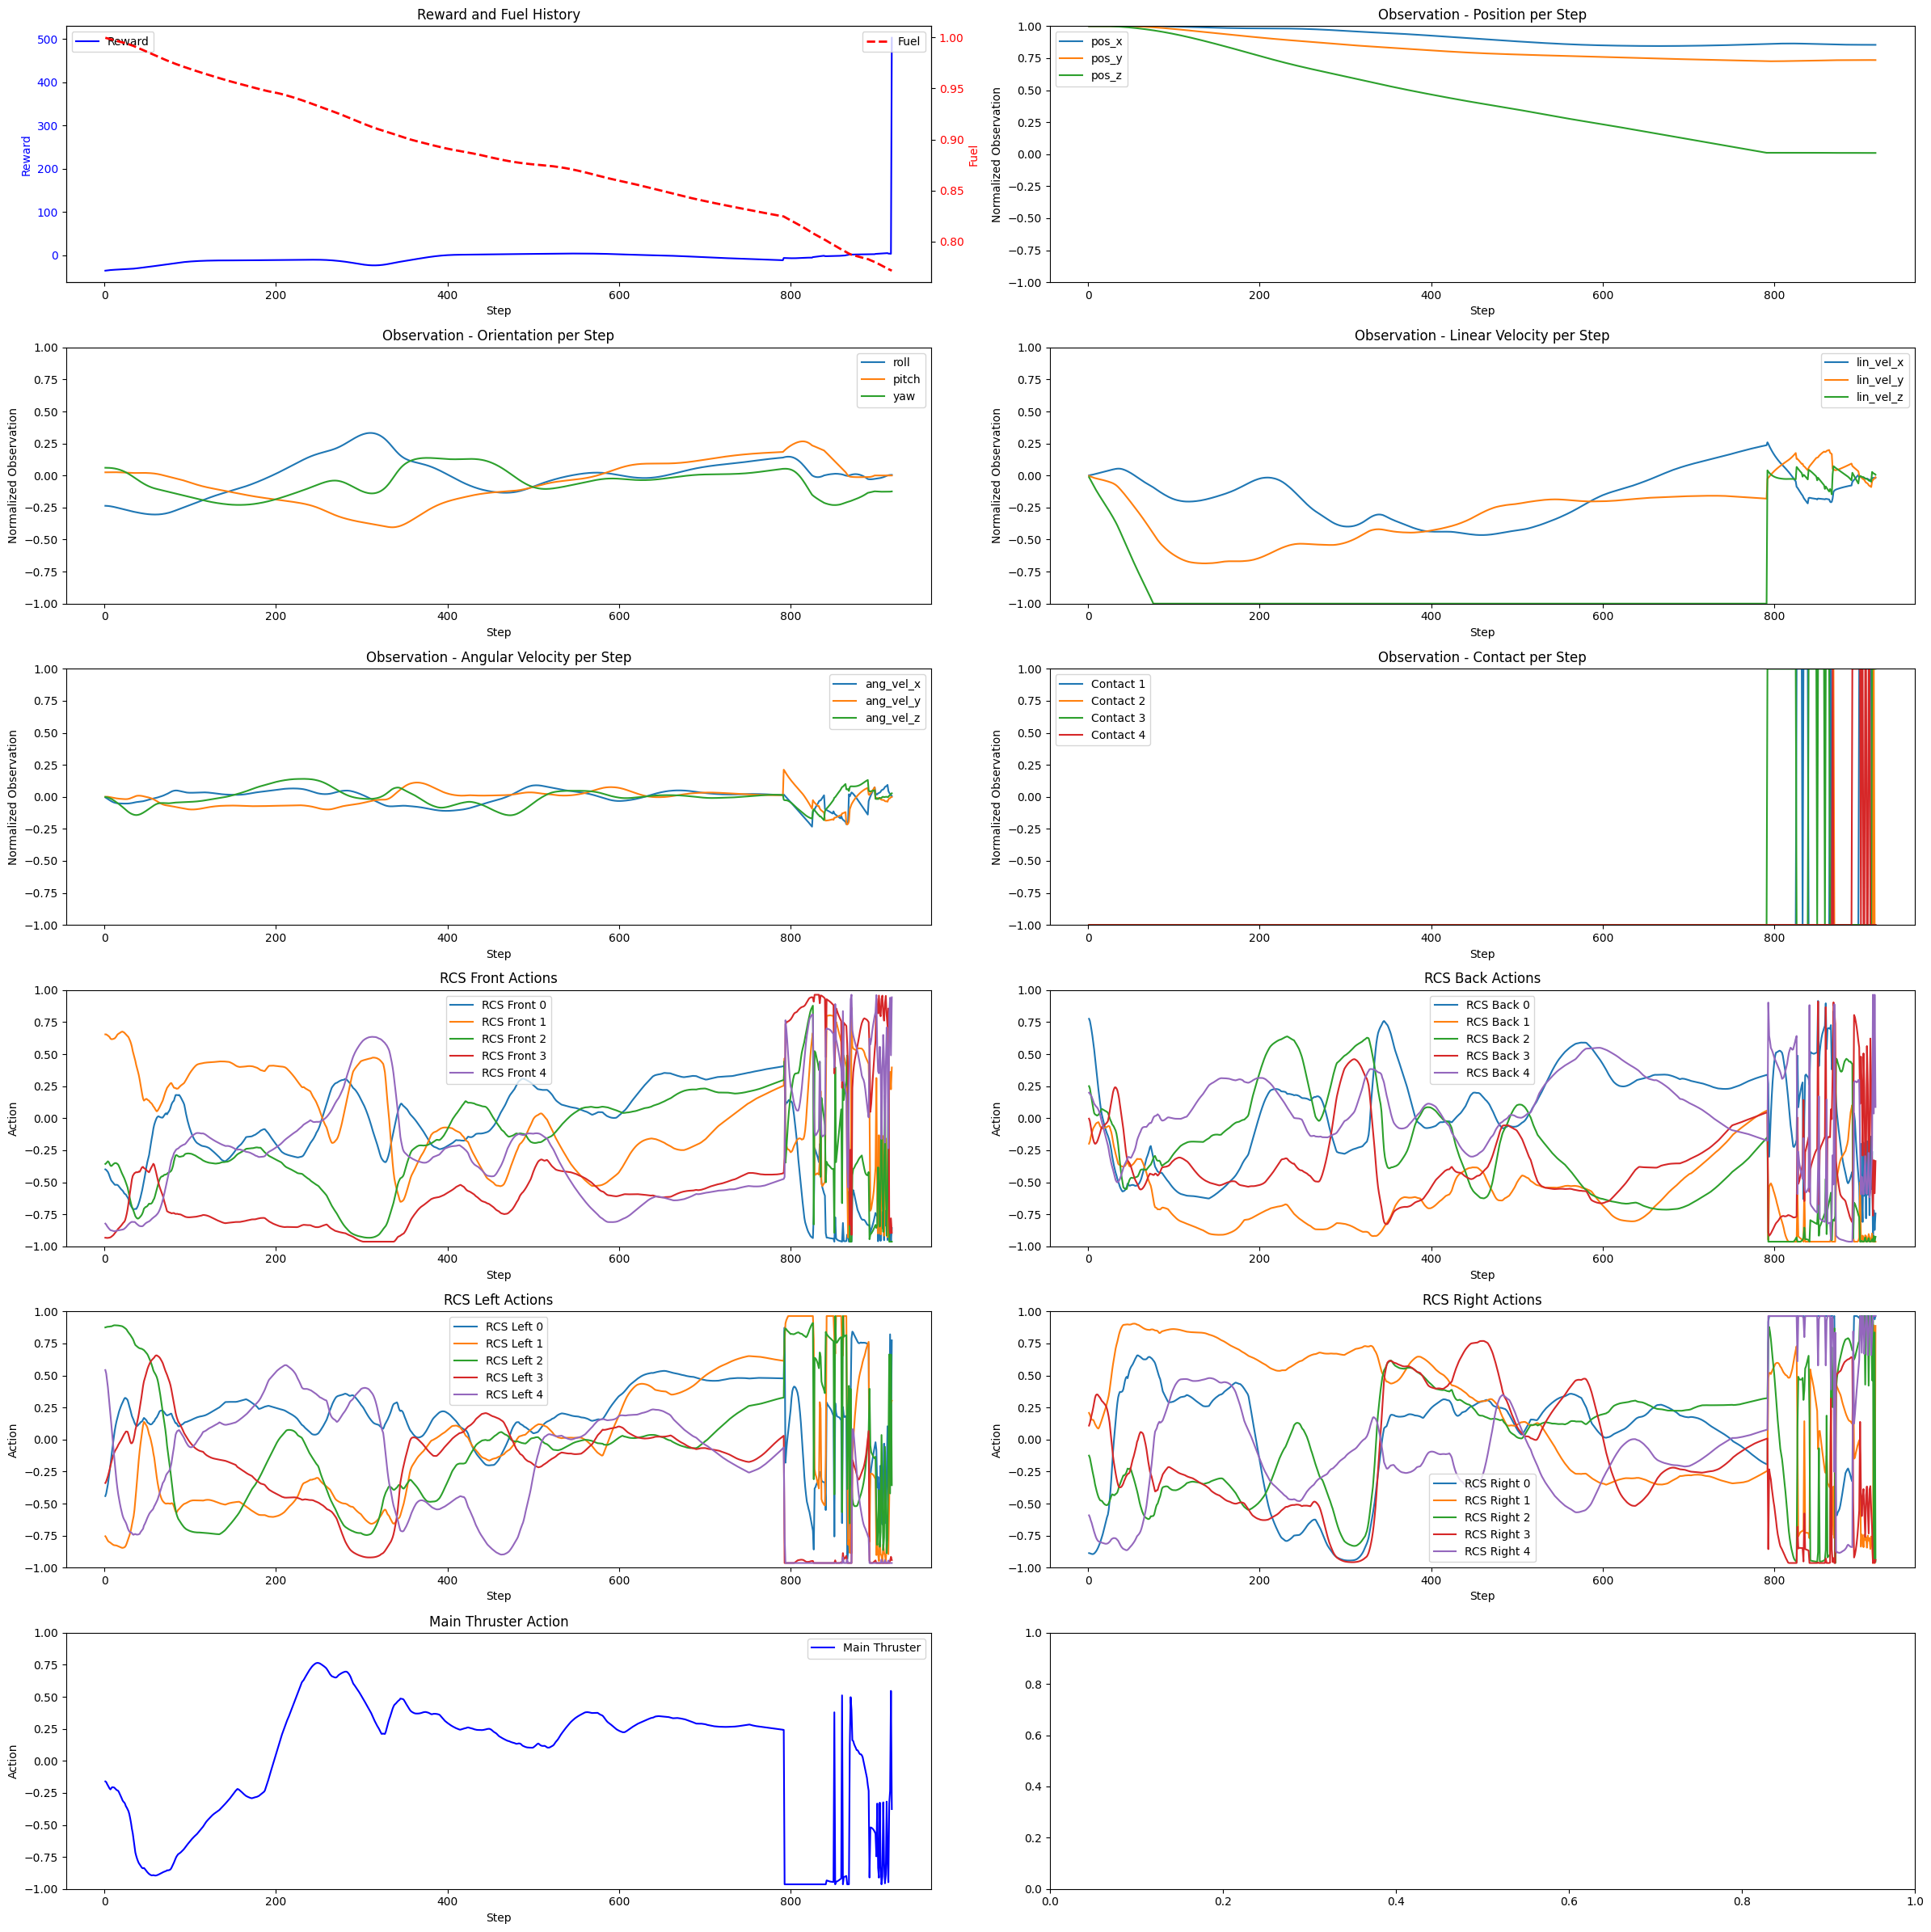

In [3]:
import gymnasium as gym
from LunarLander3DEnv.envs import LunarLander3DEnv
import time
import numpy as np
import matplotlib.pyplot as plt
# Pilih algoritma yang digunakan saat training, misal "PPO"
from stable_baselines3 import SAC

model_path = f"sac_lunar_final"  # Nama file model yang telah disimpan

# Buat environment dengan render_mode "human" agar dapat melihat visualisasi
env = gym.make("LunarLander3DEnv-v0", start_position=[100,100,100], render_mode="human")
model = SAC.load(model_path, env=env)


# Jalankan beberapa episode untuk inferensi
num_episodes = 1
for episode in range(1, num_episodes+1):
    obs, info = env.reset()
    done = False
    total_reward = 0.0
    obs_history = []
    action_history = []
    reward_history = []
    fuel_history = []
    step_history = []
    
    while not done:
        # Prediksi aksi dengan deterministik
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        
        action_history.append(action.copy())
        obs_history.append(obs.copy())
        reward_history.append(reward)
        fuel_history.append(obs[12])
        step_history.append(env.step_counter)

        total_reward += reward
        env.render()  # Pastikan render dipanggil agar kamera dan visualisasi diupdate
        #time.sleep(1/60)  # Optional: delay untuk melambatkan tampilan
        done = terminated or truncated
        time.sleep(0.001)
    print(f"Episode {episode}: Total Reward = {total_reward:.2f}")

    env.close()

    obs_history = np.array(obs_history)
    action_history = np.array(action_history)
    reward_history = np.array(reward_history)
    fuel_history = np.array(fuel_history)
    step_history = np.array(step_history)
    
    # Plotting: Pisahkan grafik aksi menjadi 5 grafik
    fig, axs = plt.subplots(6, 2, figsize=(24, 24))
    
    # Plot 1: Reward dan Fuel over Steps
    ax = axs[0, 0]
    ax.plot(step_history, reward_history, 'b-', label='Reward')
    ax.set_xlabel('Step')
    ax.set_ylabel('Reward', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    axb = ax.twinx()
    axb.plot(step_history, fuel_history, 'r--', label='Fuel', linewidth=2)
    axb.set_ylabel('Fuel', color='r')
    axb.tick_params(axis='y', labelcolor='r')
    ax.set_title('Reward and Fuel History')
    ax.legend(loc='upper left'), axb.legend(loc='upper right')
    
    # Plot 2: Observations - Position
    obs_labels_pos = ["pos_x", "pos_y", "pos_z"]
    obs_subset_pos = obs_history[:, 0:3]
    for i in range(obs_subset_pos.shape[1]):
        axs[0, 1].plot(step_history, obs_subset_pos[:, i], label=obs_labels_pos[i])
    axs[0, 1].set_xlabel('Step')
    axs[0, 1].set_ylabel('Normalized Observation')
    axs[0, 1].set_title('Observation - Position per Step')
    axs[0, 1].set_ylim(-1, 1)
    axs[0, 1].legend()
    
    # Plot 3: Observations - Orientation
    obs_labels_ori = ["roll", "pitch", "yaw"]
    obs_subset_ori = obs_history[:, 3:6]
    for i in range(obs_subset_ori.shape[1]):
        axs[1, 0].plot(step_history, obs_subset_ori[:, i], label=obs_labels_ori[i])
    axs[1, 0].set_xlabel('Step')
    axs[1, 0].set_ylabel('Normalized Observation')
    axs[1, 0].set_title('Observation - Orientation per Step')
    axs[1, 0].set_ylim(-1, 1)
    axs[1, 0].legend()
    
    # Plot 4: Observations - Linear Velocity
    obs_labels_lin_vel = ["lin_vel_x", "lin_vel_y", "lin_vel_z"]
    obs_subset_lin_vel = obs_history[:, 6:9]
    for i in range(obs_subset_lin_vel.shape[1]):
        axs[1, 1].plot(step_history, obs_subset_lin_vel[:, i], label=obs_labels_lin_vel[i])
    axs[1, 1].set_xlabel('Step')
    axs[1, 1].set_ylabel('Normalized Observation')
    axs[1, 1].set_title('Observation - Linear Velocity per Step')
    axs[1, 1].set_ylim(-1, 1)
    axs[1, 1].legend()
    
    # Plot 5: Observations - Angular Velocity
    obs_labels_ang_vel = ["ang_vel_x", "ang_vel_y", "ang_vel_z"]
    obs_subset_ang_vel = obs_history[:, 9:12]
    for i in range(obs_subset_ang_vel.shape[1]):
        axs[2, 0].plot(step_history, obs_subset_ang_vel[:, i], label=obs_labels_ang_vel[i])
    axs[2, 0].set_xlabel('Step')
    axs[2, 0].set_ylabel('Normalized Observation')
    axs[2, 0].set_title('Observation - Angular Velocity per Step')
    axs[2, 0].set_ylim(-1, 1)
    axs[2, 0].legend()
    
    # Plot 6: Observations - Contact Sensors
    contact_labels = ["Contact 1", "Contact 2", "Contact 3", "Contact 4"]
    obs_subset_contact = obs_history[:, 13:17]
    for i in range(obs_subset_contact.shape[1]):
        axs[2, 1].plot(step_history, obs_subset_contact[:, i], label=contact_labels[i])
    axs[2, 1].set_xlabel('Step')
    axs[2, 1].set_ylabel('Normalized Observation')
    axs[2, 1].set_title('Observation - Contact per Step')
    axs[2, 1].set_ylim(-1, 1)
    axs[2, 1].legend()
    
    # Plot 7: Action History (Pisahkan menjadi 5 grafik)
    main_thruster_actions = action_history[:, 0]
    rcs_front_actions = action_history[:, 1:6]
    rcs_back_actions = action_history[:, 6:11]
    rcs_left_actions = action_history[:, 11:16]
    rcs_right_actions = action_history[:, 16:21]

    

    for i in range(rcs_front_actions.shape[1]):
        axs[3, 0].plot(step_history, rcs_front_actions[:, i], label=f'RCS Front {i}')
    axs[3, 0].set_xlabel("Step") 
    axs[3, 0].set_ylabel("Action")
    axs[3, 0].set_title("RCS Front Actions")
    axs[3, 0].set_ylim(-1, 1)
    axs[3, 0].legend()
    
    for i in range(rcs_back_actions.shape[1]):
        axs[3, 1].plot(step_history, rcs_back_actions[:, i], label=f'RCS Back {i}')
    axs[3, 1].set_xlabel("Step")
    axs[3, 1].set_ylabel("Action")
    axs[3, 1].set_title("RCS Back Actions")
    axs[3, 1].set_ylim(-1, 1)
    axs[3, 1].legend()
    
    for i in range(rcs_left_actions.shape[1]):
        axs[4, 0].plot(step_history, rcs_left_actions[:, i], label=f'RCS Left {i}')
    axs[4, 0].set_xlabel("Step")
    axs[4, 0].set_ylabel("Action")
    axs[4, 0].set_title("RCS Left Actions")
    axs[4, 0].set_ylim(-1, 1)
    axs[4, 0].legend()
    
    for i in range(rcs_right_actions.shape[1]):
        axs[4, 1].plot(step_history, rcs_right_actions[:, i], label=f'RCS Right {i}')
    axs[4, 1].set_xlabel("Step")
    axs[4, 1].set_ylabel("Action")
    axs[4, 1].set_title("RCS Right Actions")
    axs[4, 1].set_ylim(-1, 1)
    axs[4, 1].legend()
    

    axs[5, 0].plot(step_history, main_thruster_actions, label="Main Thruster", color='blue')
    axs[5, 0].set_xlabel("Step") 
    axs[5, 0].set_ylabel("Action")
    axs[5, 0].set_title("Main Thruster Action")
    axs[5, 0].set_ylim(-1, 1)
    axs[5, 0].legend()

    plt.tight_layout()
    plt.show()
